In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [4]:
pro99_mode=False
which_organism = 'all'
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
        ) = get_constants_per_organism(pro99_mode, which_organism)


In [5]:

list(zip(var_names, init_var_vals))

[('Bp', 0.892857142857143),
 ('Np', 0.0),
 ('Cp', 0.0),
 ('Bh', 28.571428571428573),
 ('Nh', 0.0),
 ('Ch', 0.0),
 ('DON', 20.0),
 ('RDON', 0.0),
 ('DIN', 100.0),
 ('DOC', 132.5),
 ('RDOC', 0.0),
 ('DIC', 2241.552301207755),
 ('ROS', 0.2)]

In [6]:
init_var_vals[0], init_var_vals[3]

(0.892857142857143, 28.571428571428573)

In [7]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)


[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [8]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [9]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')
#refp99df = pd.read_excel('reference_pro99_axenic.xlsx')


In [10]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

os.listdir(dpath)

['min_mse_df.csv.gz',
 'monte3_ROS_df.csv.gz',
 'loss_analysis_vpro',
 'loss_analysis',
 'monte3_MIN_df.csv.gz',
 'monte4_sum.csv.gz',
 'monte_sum.csv.gz',
 'mean_scores.csv.gz',
 'monte3_ROS_mse.csv.gz',
 'monte_df.csv.gz',
 'monte3_ROS_sum.csv.gz',
 'sobol_ponly4_mse.csv.gz',
 'vpro_ponly_mse.csv.gz',
 'monte3_OVERFLOW_sum.csv.gz',
 'monte3_MIXOTROPH_sum.csv.gz',
 'monte4_df.csv.gz',
 'sensitivity_overflow_new_mse.csv.gz',
 'monte_mse.csv.gz',
 'monte3_EXOENZYME_sum.csv.gz',
 'monte3_EXOENZYME_df.csv.gz',
 'sensitivity_overflow_new_sum.csv.gz',
 'monte4_mse.csv.gz',
 'vpro_ponly_df.csv.gz',
 'monte3_MIN_mse.csv.gz',
 'sobol_ponly4_sum.csv.gz',
 'mrows.csv.gz',
 'monte3_OVERFLOW_mse.csv.gz',
 'baseline_overflow_new_mse.csv.gz',
 'baseline_overflow_new_sum.csv.gz',
 'sobol_ponly3_mse.csv.gz',
 'monte3_EXOENZYME_mse.csv.gz',
 'vpro_ponly_sum.csv.gz',
 'sobol_ponly3_df.csv.gz',
 'sobol_ponly3_sum.csv.gz',
 'monte3_MIN_sum.csv.gz',
 'monte3_OVERFLOW_df.csv.gz',
 'monte3_MIXOTROPH_df.csv.g

In [11]:
sum_sdf = pd.read_csv(os.path.join(dpath,'sensitivity_overflow_new_sum.csv.gz' ))
sdf =  pd.read_csv(os.path.join(dpath,'sensitivity_overflow_new_df.csv.gz' ))
mse_sdf = pd.read_csv(os.path.join(dpath,'sensitivity_overflow_new_mse.csv.gz' ))

In [12]:
sum_bdf = pd.read_csv(os.path.join(dpath,'baseline_overflow_new_sum.csv.gz' ))
bdf =  pd.read_csv(os.path.join(dpath,'baseline_overflow_new_df.csv.gz' ))
mse_bdf = pd.read_csv(os.path.join(dpath,'baseline_overflow_new_mse.csv.gz' ))

In [13]:
def _params_from_runid_sen(x):
    
    df = x.str.replace(r'_h-*[0-9]+', '', regex=True
         ).str.replace('sensitivity_', '', regex=False
         ).str.replace('baseline_', 'p_1_0_', regex=False
         ).str.rsplit('_', expand=True,n=5)
    df.rename(columns={0:'param', 2:'paramval', 3:'media', 4: 'mode', 5:'model'}, inplace=True)
    df['run_id'] = x
    
    df.loc[df.param.isin(['p']), ['run', ]] = 'base'
    df['run'] = 'sensitivity'
    df.loc[df.param.isin(['p']), ['param', 'paramval', ]] = np.NaN
    return df[['media', 'mode', 'model', 'run', 'run_id', 'param', 'paramval', ]]

senparams = _params_from_runid_sen(sum_sdf.run_id)

sdf = pd.merge(sdf, senparams, on='run_id', how='left')
#mse_df = pd.merge(mse_df, senparams, on='run_id', how='left')
#sum_df = pd.merge(sum_df, senparams, on='run_id', how='left')


In [14]:
bparams = _params_from_runid_sen(sum_bdf.run_id)
bparams['run'] = 'baseline'
bparams
bdf = pd.merge(bdf, bparams, on='run_id', how='left')


# sensitivity dfs

In [15]:
bdf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal[N]', 'Bptotal[C]', 'log_Bptotal[N]', 'log_Bptotal[C]',
       'run_id', 'Bh', 'Nh', 'Ch', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICh', 'gross_uptakeOCh', 'uptakeNh', 'uptakeCh', 'QCh',
       'biosynthesisNh', 'respirationCh', 'biomass_breakdownCh', 'overflowNh',
       'overflowCh', 'Bh[C]', 'Bhtotal[N]', 'Bhtotal[C]', 'media', 'mode',
       'model', 'run', 'param', 'paramval'],
      dtype='object')

In [16]:
params_list = senparams['param'].dropna().unique()

In [17]:
negative_ids = sdf.loc[sdf[var_names].min(axis=1) < -1e-6, 'run_id' ] 
negative_ids

Series([], Name: run_id, dtype: object)

In [18]:
negative_idsb = bdf.loc[bdf[var_names].min(axis=1) < -1e-6, 'run_id' ] 
negative_idsb

Series([], Name: run_id, dtype: object)

In [19]:
sdf = sdf.loc[~sdf.run_id.isin(negative_ids)]

In [20]:
bdf[var_names].min()

Bp      8.928571e-01
Np      0.000000e+00
Cp      0.000000e+00
Bh      1.466914e+00
Nh      0.000000e+00
Ch     -4.787430e-18
DON     1.304823e-02
RDON    0.000000e+00
DIN     1.195817e-08
DOC     6.077379e-03
RDOC    0.000000e+00
DIC     1.362858e+03
ROS     2.441689e-02
dtype: float64

In [21]:
sdf.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 't', 'day', 'gross_uptakeINp', 'gross_uptakeINh',
       'gross_uptakeONp', 'gross_uptakeONh', 'gross_uptakeICp',
       'gross_uptakeICh', 'gross_uptakeOCp', 'gross_uptakeOCh', 'uptakeNp',
       'uptakeNh', 'uptakeCp', 'uptakeCh', 'QCp', 'QCh', 'biosynthesisNp',
       'biosynthesisNh', 'respirationCp', 'respirationCh',
       'biomass_breakdownCp', 'biomass_breakdownCh', 'overflowNp',
       'overflowNh', 'overflowCp', 'overflowCh', 'Bp[C]', 'Bptotal[N]',
       'Bptotal[C]', 'log_Bptotal[N]', 'log_Bptotal[C]', 'Bh[C]', 'Bhtotal[N]',
       'Bhtotal[C]', 'run_id', 'media', 'mode', 'model', 'run', 'param',
       'paramval'],
      dtype='object')

In [22]:
sdf.dtypes

Bp                     float64
Np                     float64
Cp                     float64
Bh                     float64
Nh                     float64
Ch                     float64
DON                    float64
RDON                   float64
DIN                    float64
DOC                    float64
RDOC                   float64
DIC                    float64
ROS                    float64
t                      float64
day                    float64
gross_uptakeINp        float64
gross_uptakeINh        float64
gross_uptakeONp        float64
gross_uptakeONh        float64
gross_uptakeICp        float64
gross_uptakeICh        float64
gross_uptakeOCp        float64
gross_uptakeOCh        float64
uptakeNp               float64
uptakeNh               float64
uptakeCp               float64
uptakeCh               float64
QCp                    float64
QCh                    float64
biosynthesisNp         float64
biosynthesisNh         float64
respirationCp          float64
respirat

In [23]:
sdf['paramval'] = pd.to_numeric(sdf['paramval'])

In [24]:
sdf.head()

Bp        Np         Cp         Bh         Nh            Ch  \
0  0.892857  0.000000   0.000000  28.571429   0.000000  0.000000e+00   
1  1.434165  0.332436   4.456830  45.784880  13.939182  1.116131e+00   
2  2.774146  0.653431   8.675219  37.337399  16.258547 -1.949516e-20   
3  3.964658  0.934944  12.400900  33.491952  17.070582 -2.774940e-21   
4  7.354492  1.736015  23.024069  28.091422  17.627794 -2.508351e-21   

         DON      RDON         DIN         DOC  ...       Bh[C]  Bhtotal[N]  \
0  20.000000  0.000000  100.000000  132.500000  ...  142.857143   28.571429   
1   5.924992  1.223321   80.825309    0.005808  ...  228.924399   59.724062   
2   9.854232  2.503207   80.083323    0.006209  ...  186.686994   53.595946   
3  11.419464  3.157902   79.424784    0.006643  ...  167.459760   50.562534   
4  12.849861  4.263132   77.541569    0.008029  ...  140.457111   45.719216   

   Bhtotal[C]                                             run_id  media  mode  \
0  142.857143  sensitivity_VmaxINp_1_4.872007090648432e-06_lo...   lowN   all   
1  230.040530  sensitivity_VmaxINp_1_4.872007090648432e-06_lo...   lowN   all   
2  186.686994  sensitivity_VmaxINp_1_4.872007090648432e-06_lo...   lowN   all   
3  167.459760  sensitivity_VmaxINp_1_4.872007090648432e-06_lo...   lowN   all   
4  140.457111  sensitivity_VmaxINp_1_4.872007090648432e-06_lo...   lowN   all   

       model          run    param  paramval  
0  MIXOTROPH  sensitivity  VmaxINp  0.000005  
1  MIXOTROPH  sensitivity  VmaxINp  0.000005  
2  MIXOTROPH  sensitivity  VmaxINp  0.000005  
3  MIXOTROPH  sensitivity  VmaxINp  0.000005  
4  MIXOTROPH  sensitivity  VmaxINp  0.000005  

[5 rows x 54 columns]

In [44]:
bdf

Bp         Np          Cp        DON       RDON           DIN  \
0      0.892857   0.000000    0.000000  20.000000   0.000000  1.000000e+02   
1      3.171689   1.824217   10.753669  19.447647   0.053934  9.639537e+01   
2     15.247304   8.784037   51.795289  17.083316   0.316361  7.946184e+01   
3     35.500146  20.437256  120.567244  13.175417   0.756440  5.102360e+01   
4    105.712693  12.388159  359.584200   0.024532   2.767473  2.172067e-08   
..          ...        ...         ...        ...        ...           ...   
735    1.915454   0.062830    5.980409  99.841571  45.752990  4.767292e-03   
736    1.908040   0.062602    5.957284  99.478787  46.131157  4.768467e-03   
737    1.903690   0.062465    5.943711  99.261406  46.357483  4.768936e-03   
738    1.899328   0.062326    5.930099  99.041016  46.586799  4.769288e-03   
739    1.889283   0.062003    5.898746  98.527254  47.121004  4.769791e-03   

            DOC        RDOC          DIC       ROS  ...  overflowCh     Bh[C]  \
0    132.500000    0.000000  2241.552301  0.200000  ...         NaN       NaN   
1    128.902859    0.343647  2219.911793  0.200000  ...         NaN       NaN   
2    112.237757    2.012290  2120.570560  0.200000  ...         NaN       NaN   
3     84.306689    4.810864  1954.550535  0.200000  ...         NaN       NaN   
4      1.148467   19.486340  1381.485822  0.200000  ...         NaN       NaN   
..          ...         ...          ...       ...  ...         ...       ...   
735    0.020777  290.002874  2236.837397  0.059474  ...         0.0  7.439969   
736    0.020781  292.581559  2236.803281  0.059483  ...         0.0  7.409394   
737    0.020783  294.124902  2236.792396  0.059487  ...         0.0  7.391792   
738    0.020784  295.688663  2236.786596  0.059490  ...         0.0  7.374325   
739    0.020786  299.331589  2236.787047  0.059493  ...         0.0  7.334572   

     Bhtotal[N]  Bhtotal[C]  media   mode      model       run  param  \
0           NaN         NaN   lowN  ponly  MIXOTROPH  baseline    NaN   
1           NaN         NaN   lowN  ponly  MIXOTROPH  baseline    NaN   
2           NaN         NaN   lowN  ponly  MIXOTROPH  baseline    NaN   
3           NaN         NaN   lowN  ponly  MIXOTROPH  baseline    NaN   
4           NaN         NaN   lowN  ponly  MIXOTROPH  baseline    NaN   
..          ...         ...    ...    ...        ...       ...    ...   
735    1.886673    7.683845   lowN    all        ROS  baseline    NaN   
736    1.878932    7.652385   lowN    all        ROS  baseline    NaN   
737    1.874473    7.634253   lowN    all        ROS  baseline    NaN   
738    1.870047    7.616247   lowN    all        ROS  baseline    NaN   
739    1.859971    7.575240   lowN    all        ROS  baseline    NaN   

     paramval  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
735       NaN  
736       NaN  
737       NaN  
738       NaN  
739       NaN  

[740 rows x 54 columns]

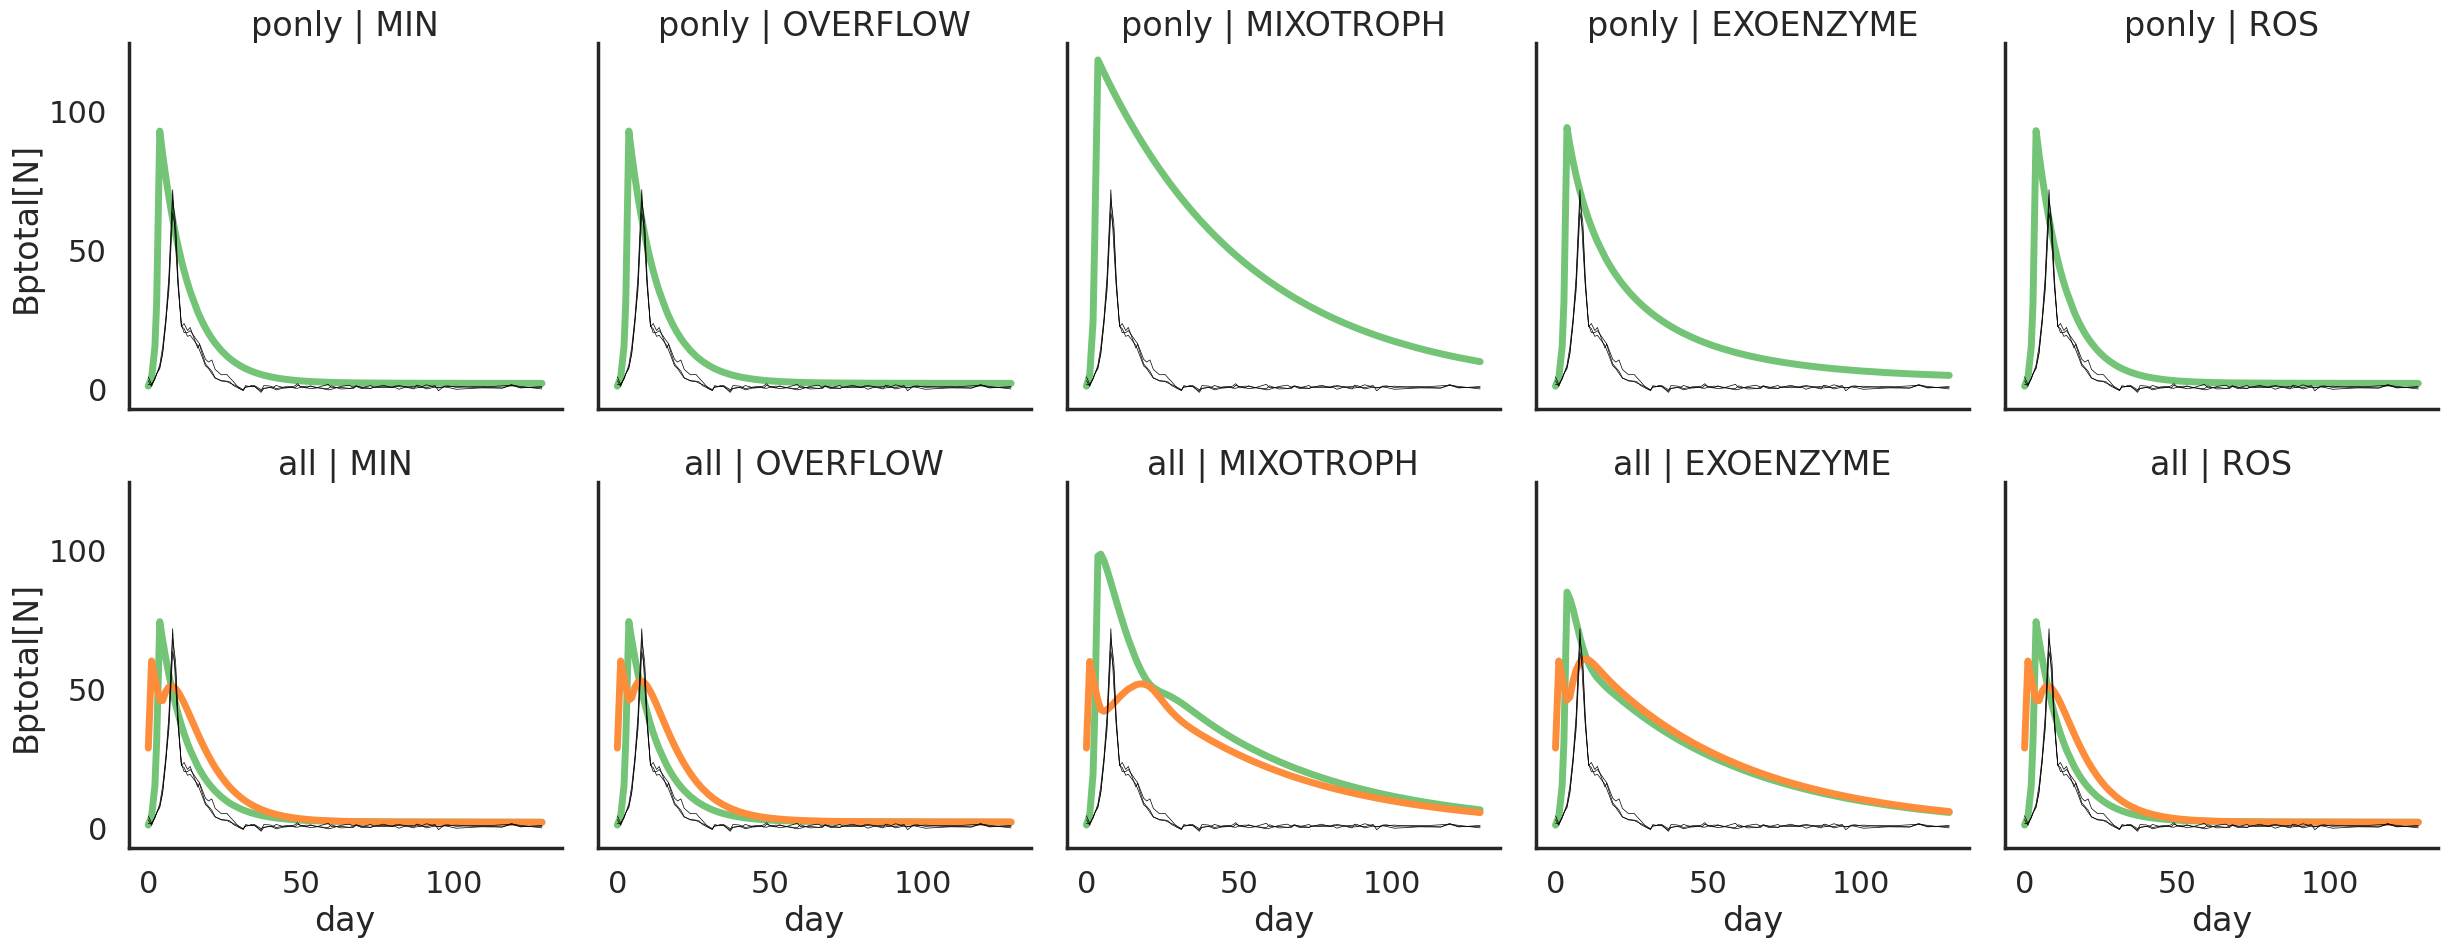

In [45]:

import matplotlib.colors as colors

curdf = bdf

g = sns.relplot(
    data=curdf, x='day', y='Bptotal[N]',
    units='run_id', estimator=None,
     kind='line', #hue_norm=colors.LogNorm(),
    row='mode', lw=5, legend=False, palette='Greens',
    row_order=['ponly', 'all'],
    col='model', col_order=morder, hue='run',

)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == 'all':
        sns.lineplot(
            data=curdf.loc[curdf['mode'].isin(['all']) &
                           curdf.model.isin([col_val])
                          ], 
            x='day', y='Bhtotal[N]',
            units='run_id', estimator=None,
             #hue_norm=colors.LogNorm(),
             lw=5, legend=False, palette='Oranges',hue='run',
             ax=ax,
        )
    datadf = refdf 
    sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
    units='Sample', estimator=None, ax=ax, lw=0.5, color='black',

                 legend=False
                )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
#plt.suptitle(f'bas', y=1.05)
plt.show()


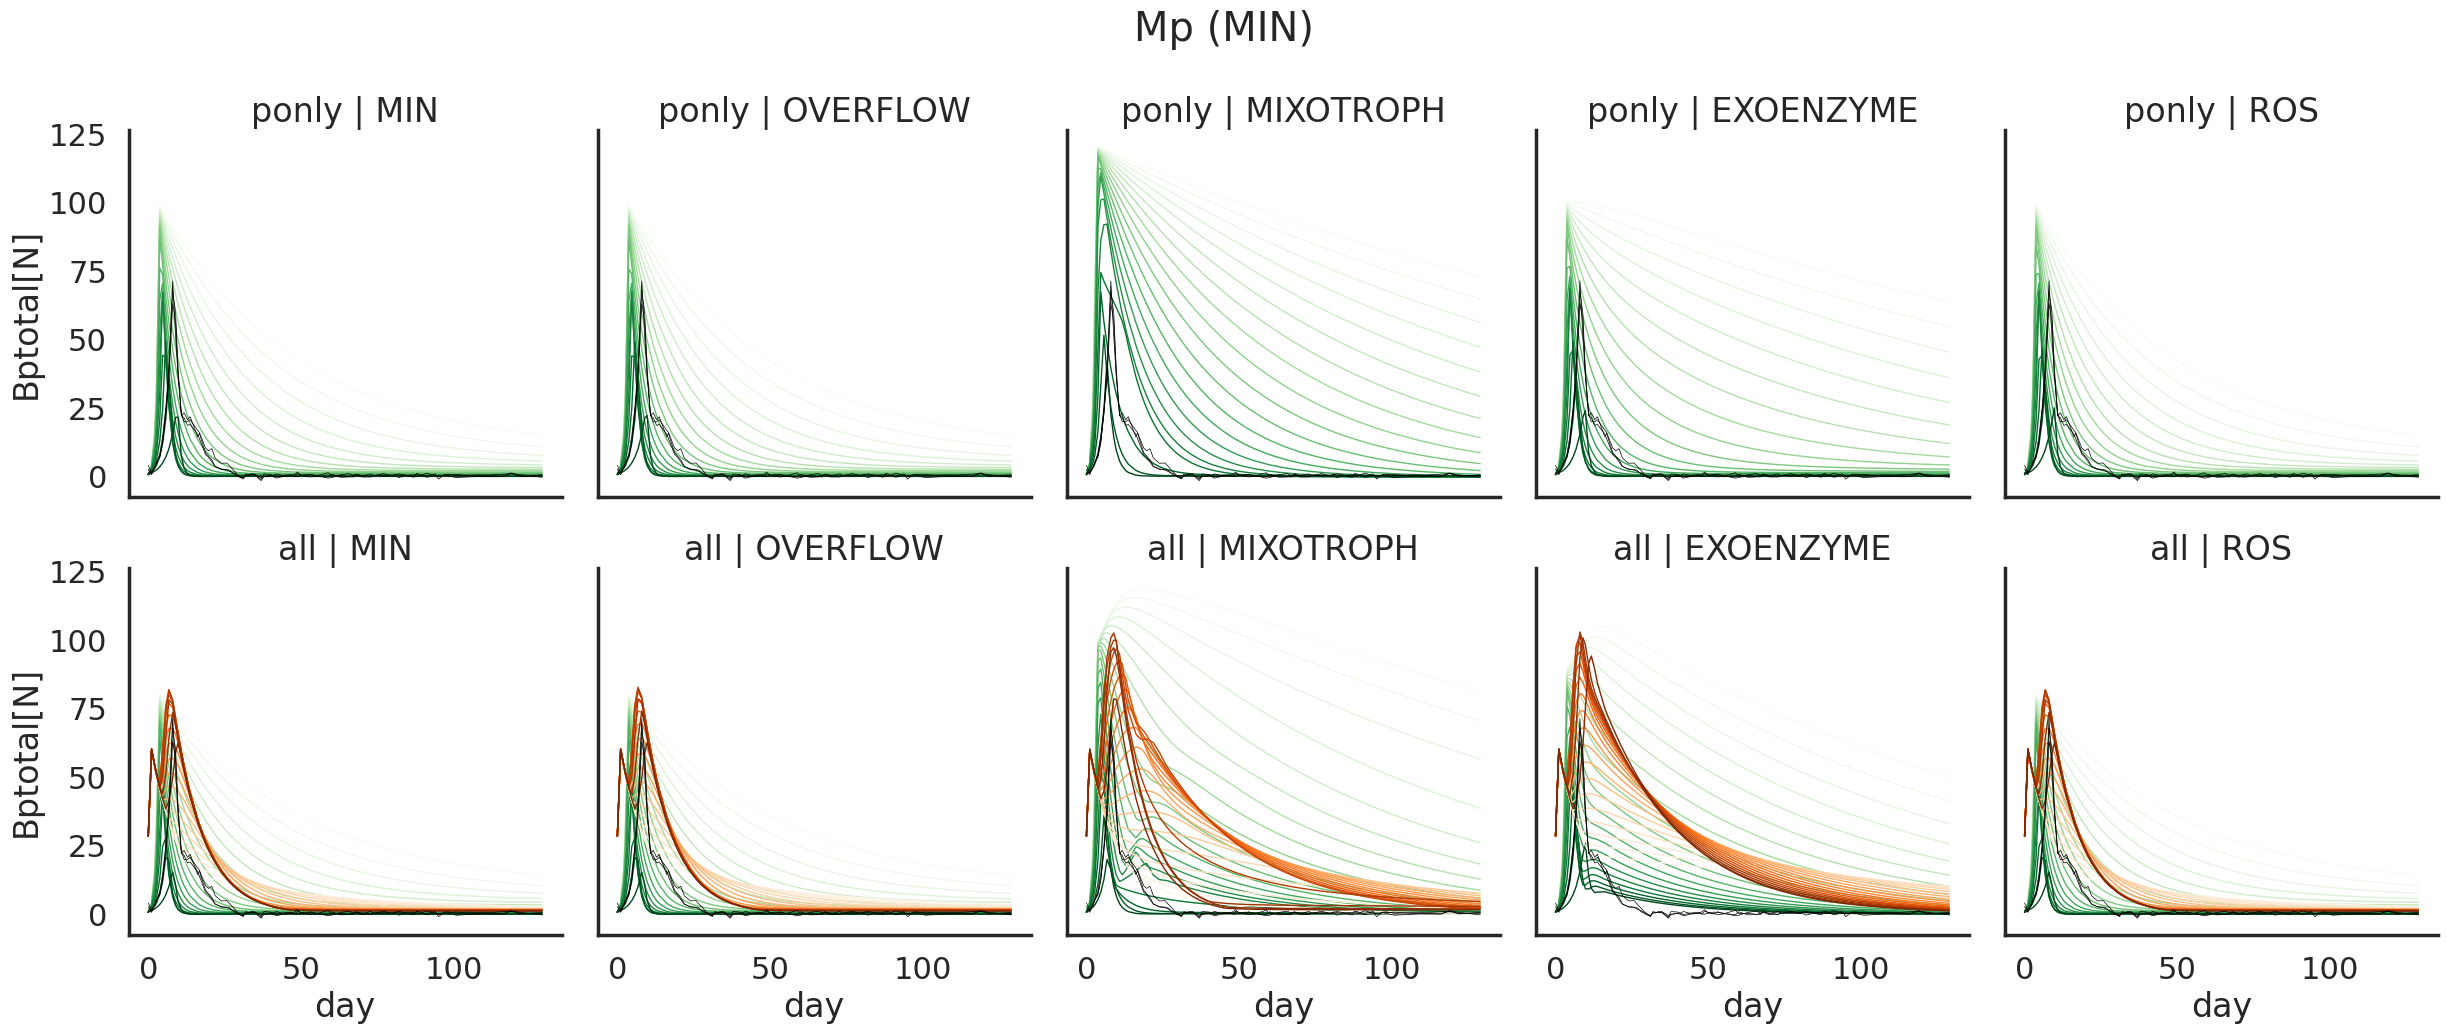

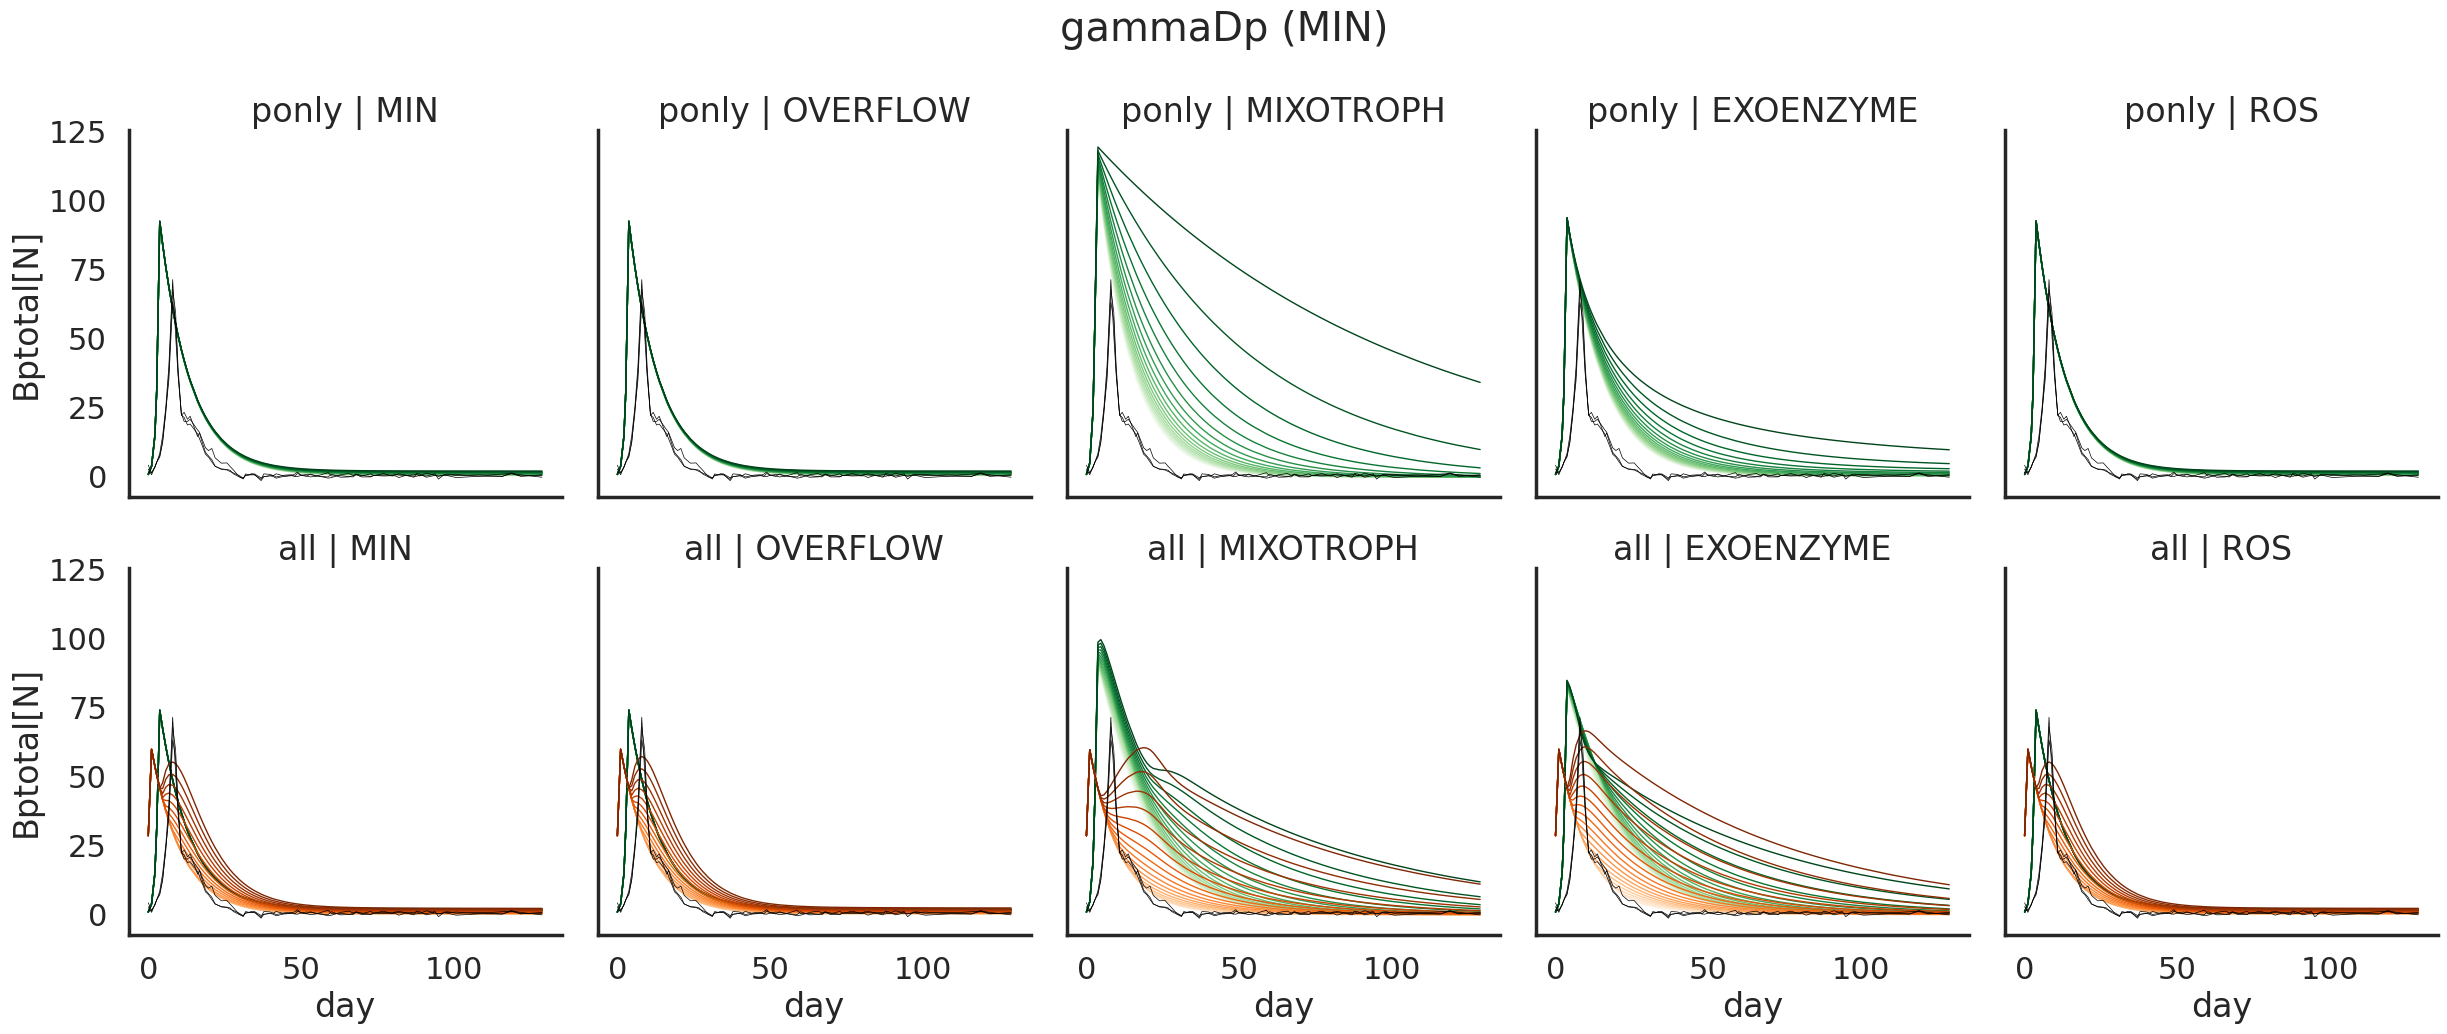

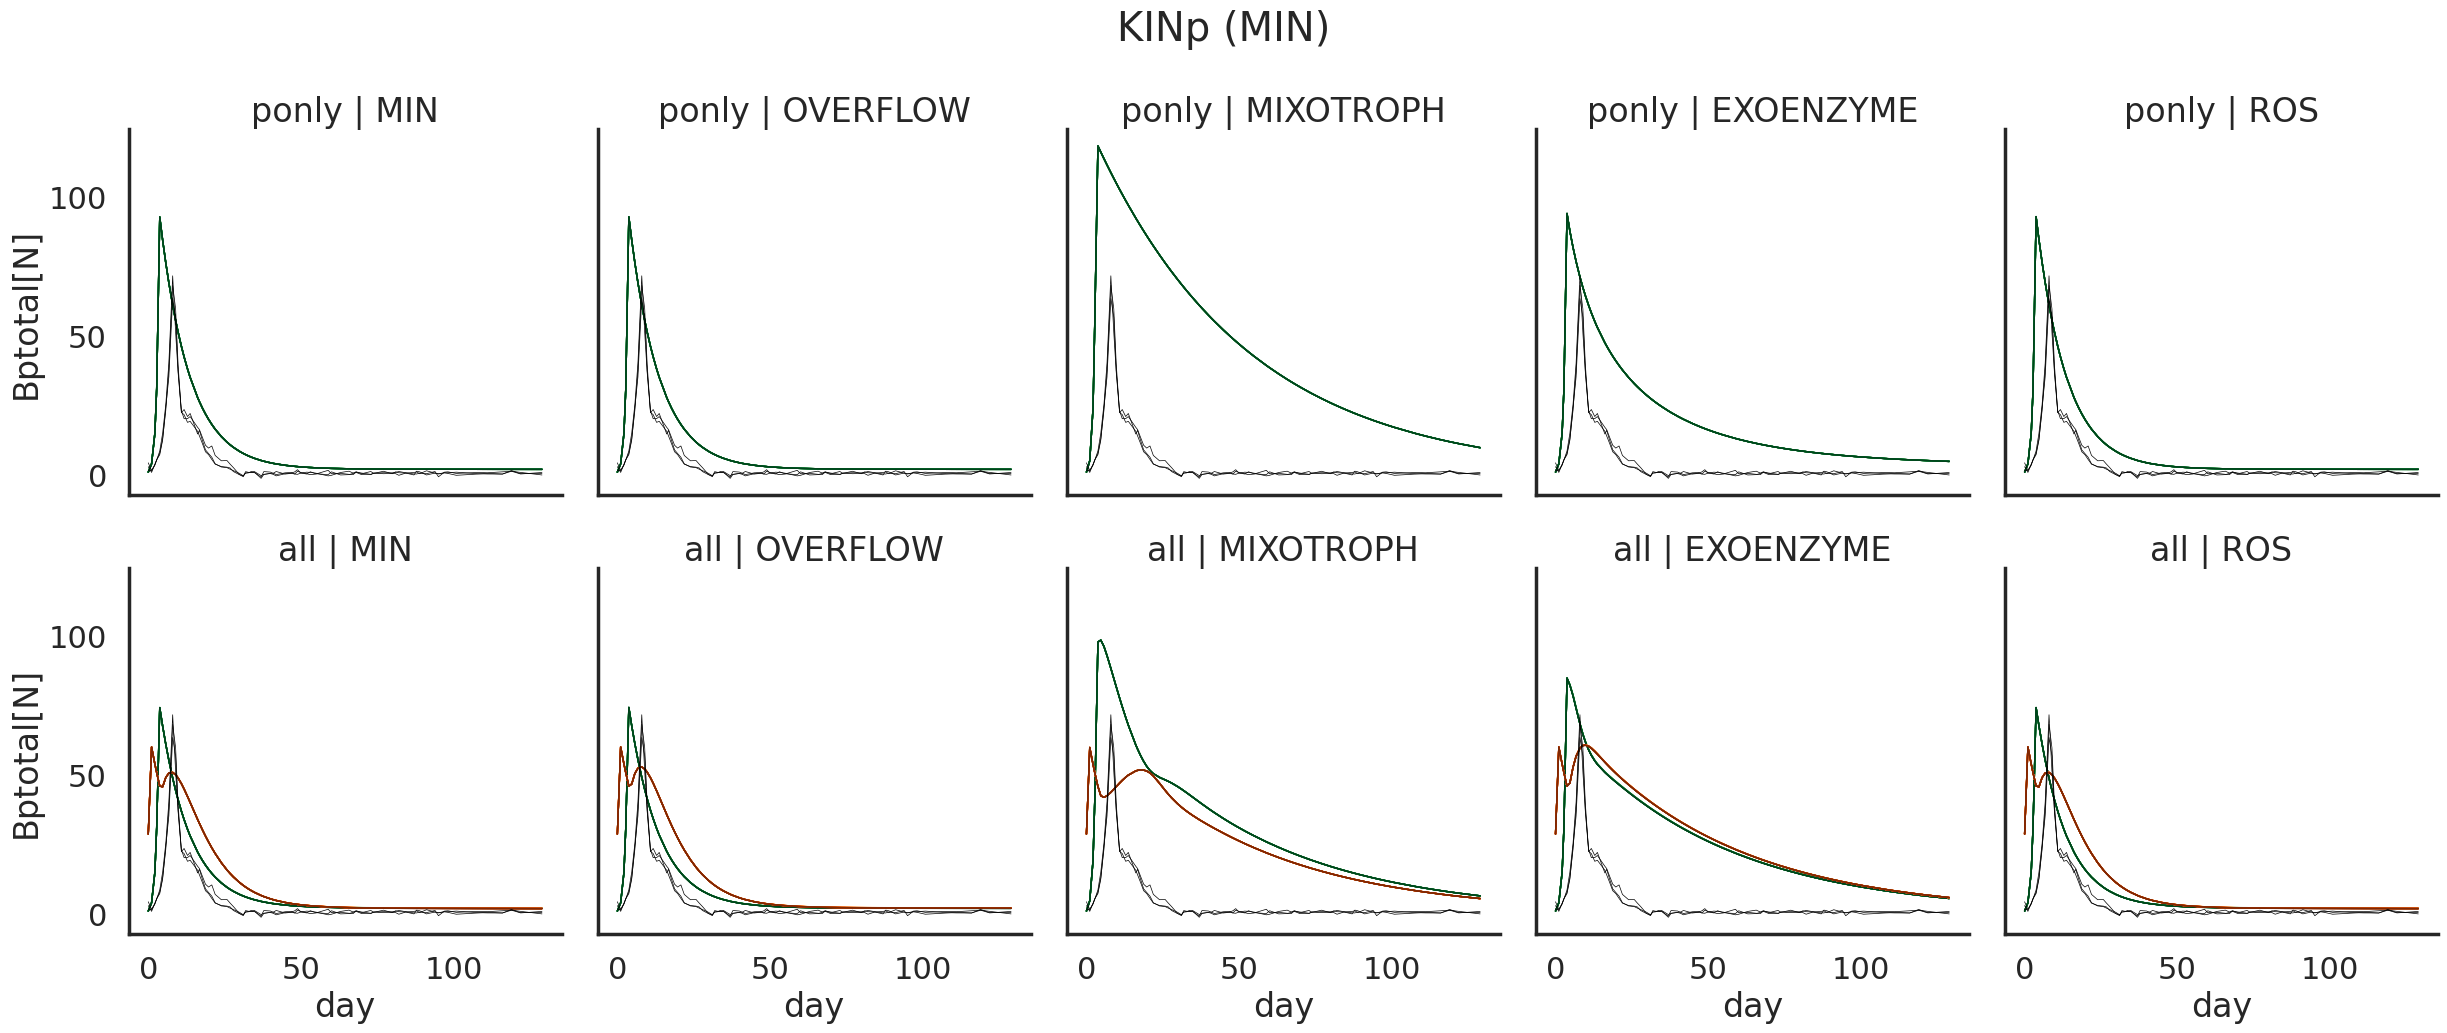

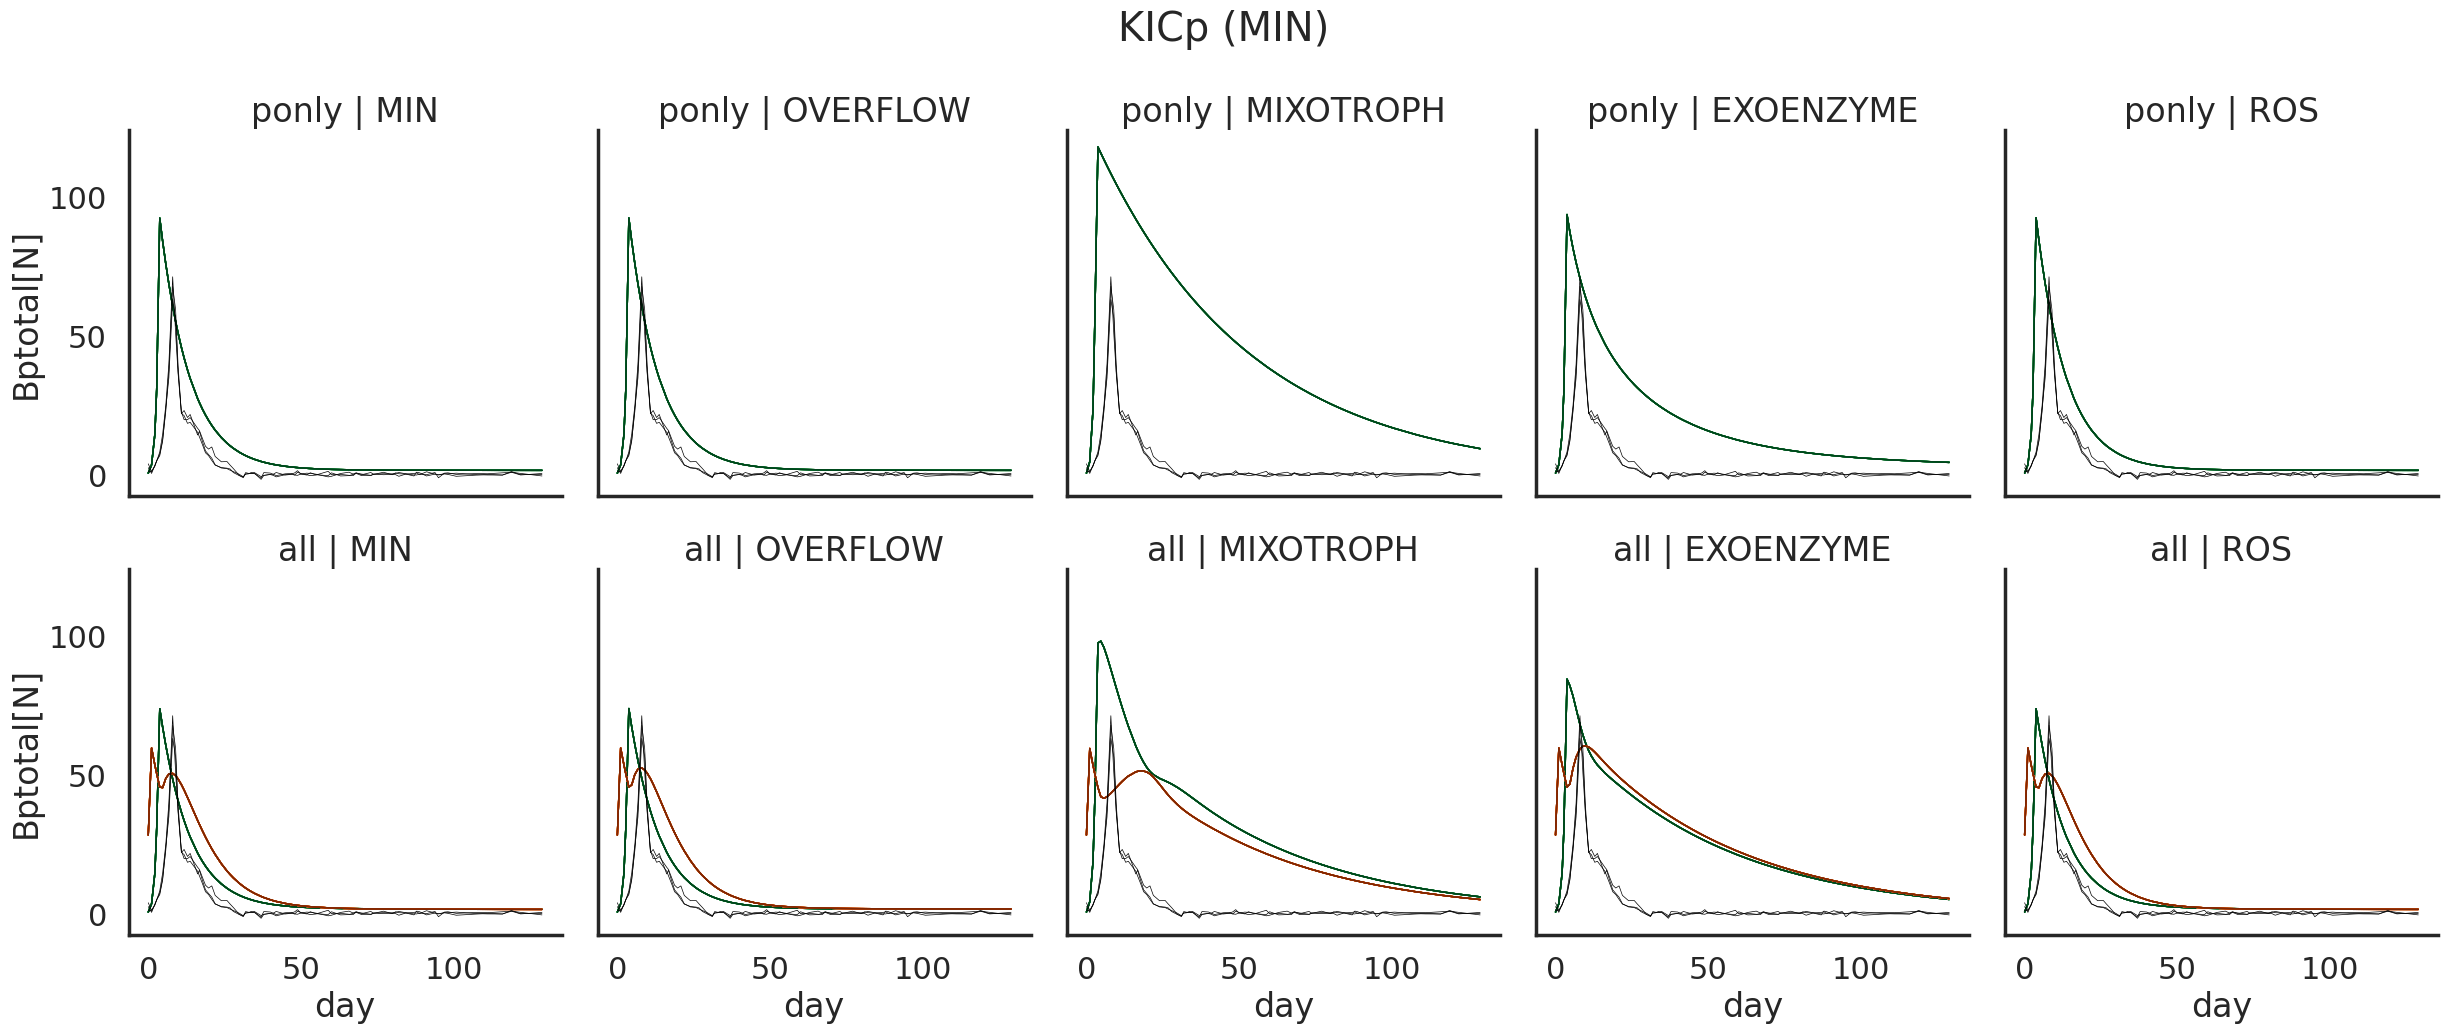

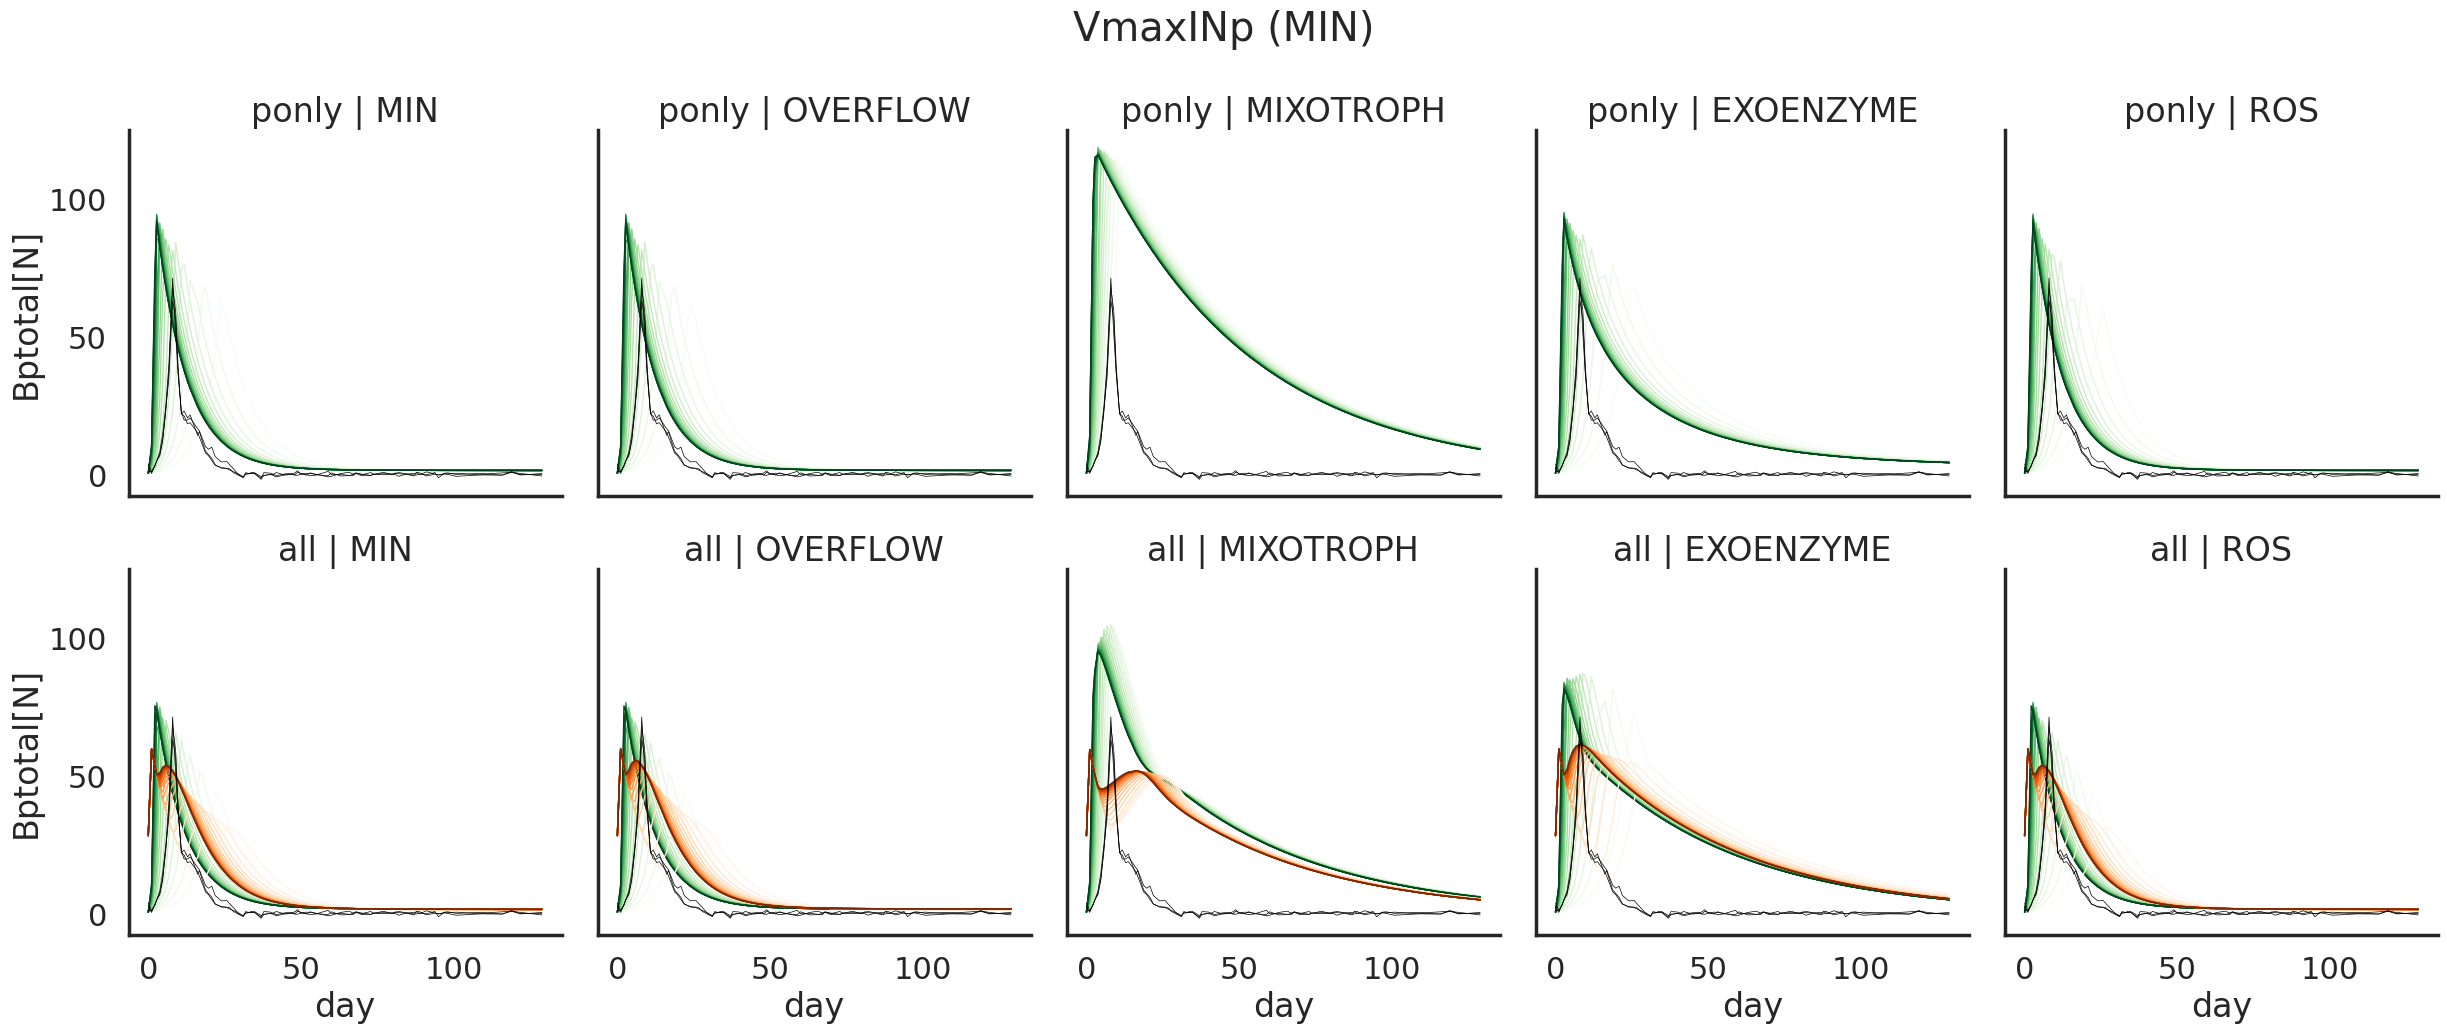

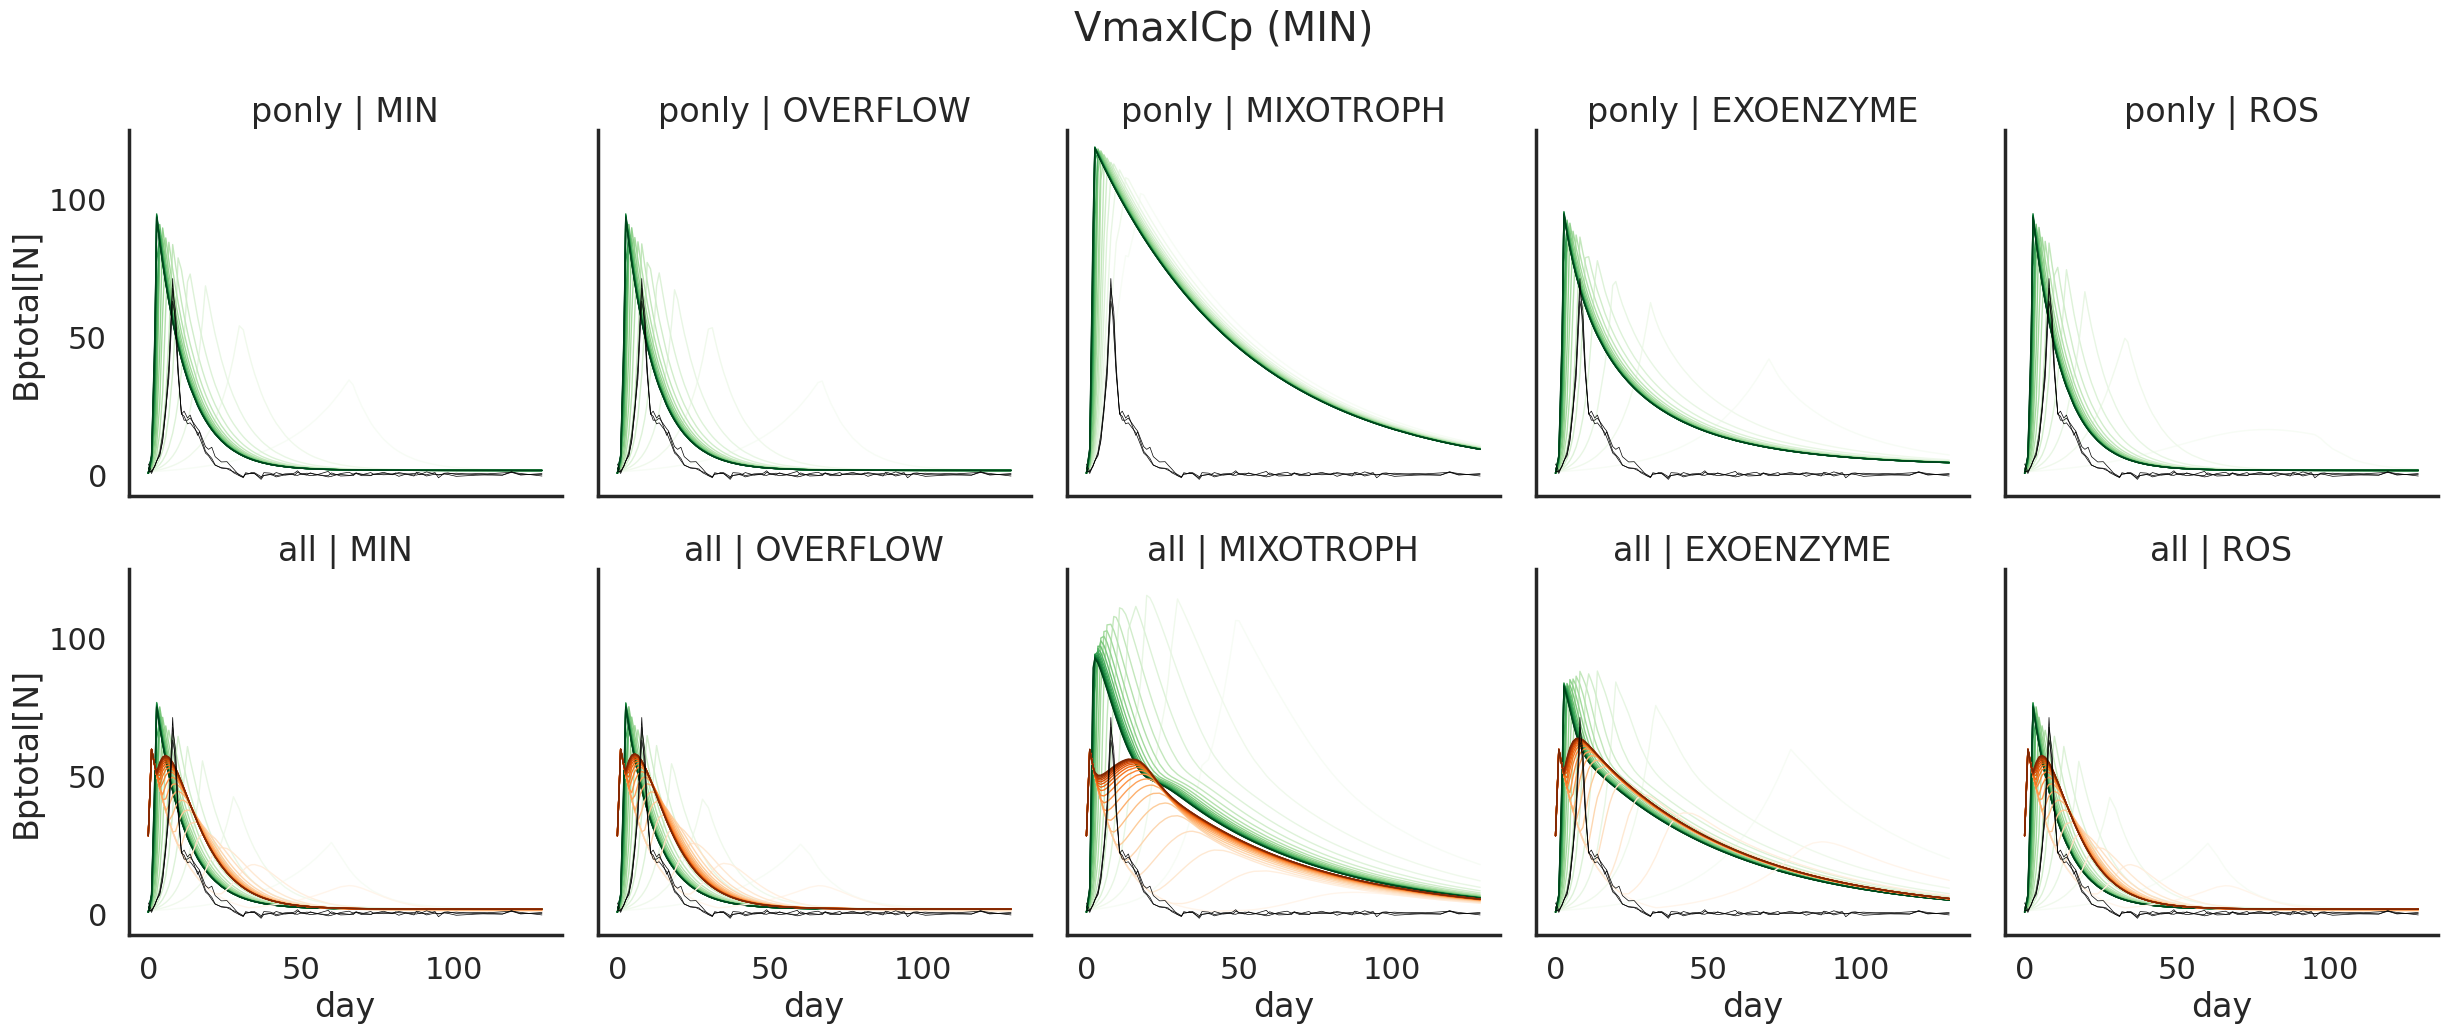

In [25]:

import matplotlib.colors as colors
organism_to_tune = 'PRO'
for model in ['MIN']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    curdf = sdf.loc[#sdf.model.isin([model]) & 
                    sdf.param.isin(pro_params_to_update) 
                    
                   ]
    for p in pro_params_to_update:
        
        g = sns.relplot(
            data=curdf.loc[curdf.param.isin([p])], x='day', y='Bptotal[N]',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            row='mode', lw=1, legend=False, palette='Greens',
            row_order=['ponly', 'all'],
            col='model', col_order=morder,
            hue='paramval', 
        )
        for (row_val, col_val), ax in g.axes_dict.items():
            if row_val == 'all':
                sns.lineplot(
                    data=curdf.loc[curdf.param.isin([p]) & curdf['mode'].isin(['all']) &
                                   curdf.model.isin([col_val])
                                  ], 
                    x='day', y='Bhtotal[N]',
                    units='run_id', estimator=None,
                     hue_norm=colors.LogNorm(),
                     lw=1, legend=False, palette='Oranges',
                    hue='paramval', ax=ax,
                )
            datadf = refdf 
            sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='black',

                         legend=False
                        )
        g.set_titles(col_template='{col_name}', row_template='{row_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


In [26]:
sdf.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 't', 'day', 'gross_uptakeINp', 'gross_uptakeINh',
       'gross_uptakeONp', 'gross_uptakeONh', 'gross_uptakeICp',
       'gross_uptakeICh', 'gross_uptakeOCp', 'gross_uptakeOCh', 'uptakeNp',
       'uptakeNh', 'uptakeCp', 'uptakeCh', 'QCp', 'QCh', 'biosynthesisNp',
       'biosynthesisNh', 'respirationCp', 'respirationCh',
       'biomass_breakdownCp', 'biomass_breakdownCh', 'overflowNp',
       'overflowNh', 'overflowCp', 'overflowCh', 'Bp[C]', 'Bptotal[N]',
       'Bptotal[C]', 'log_Bptotal[N]', 'log_Bptotal[C]', 'Bh[C]', 'Bhtotal[N]',
       'Bhtotal[C]', 'run_id', 'media', 'mode', 'model', 'run', 'param',
       'paramval'],
      dtype='object')

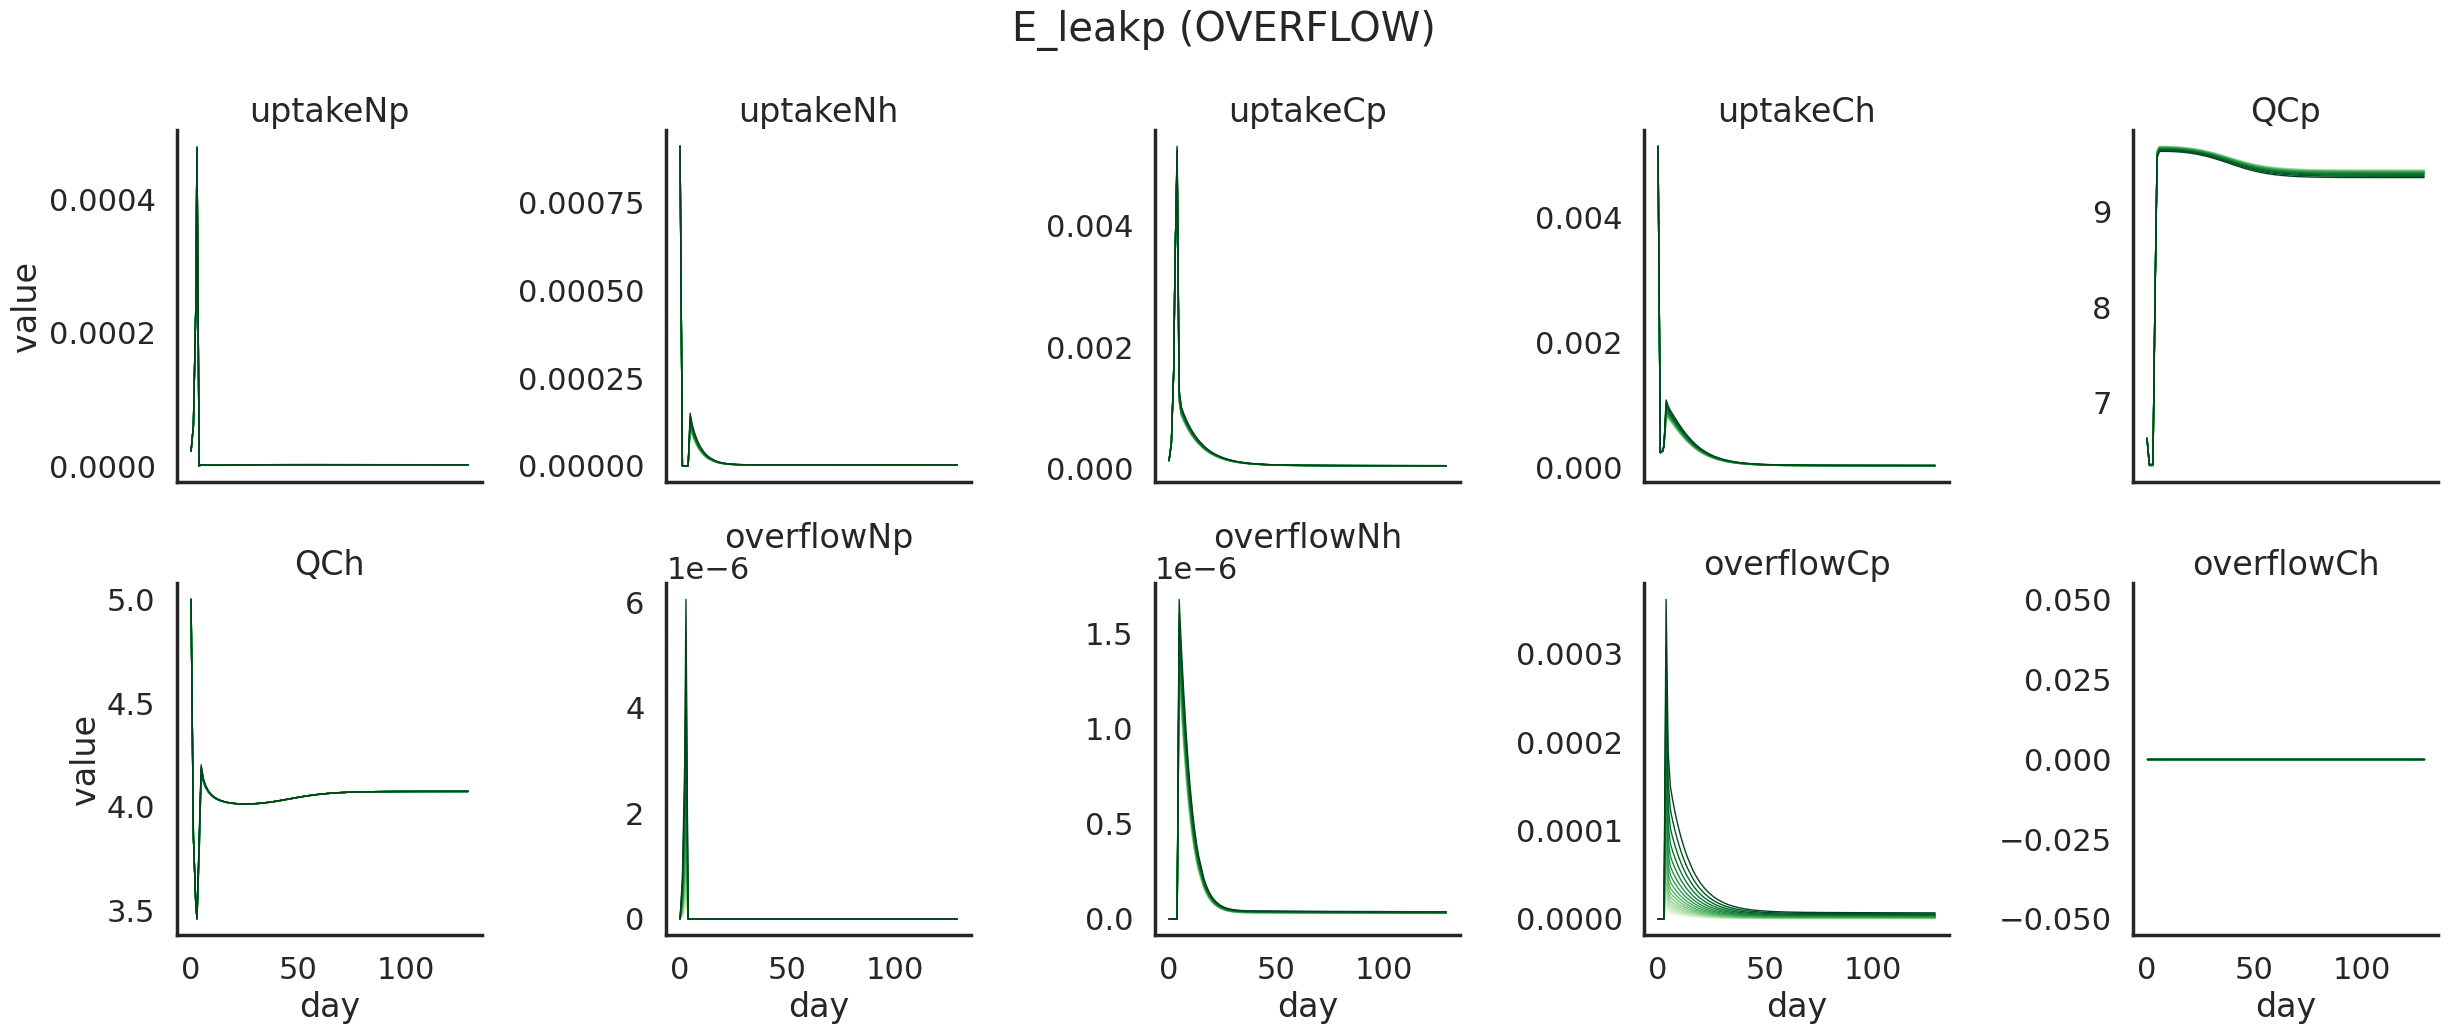

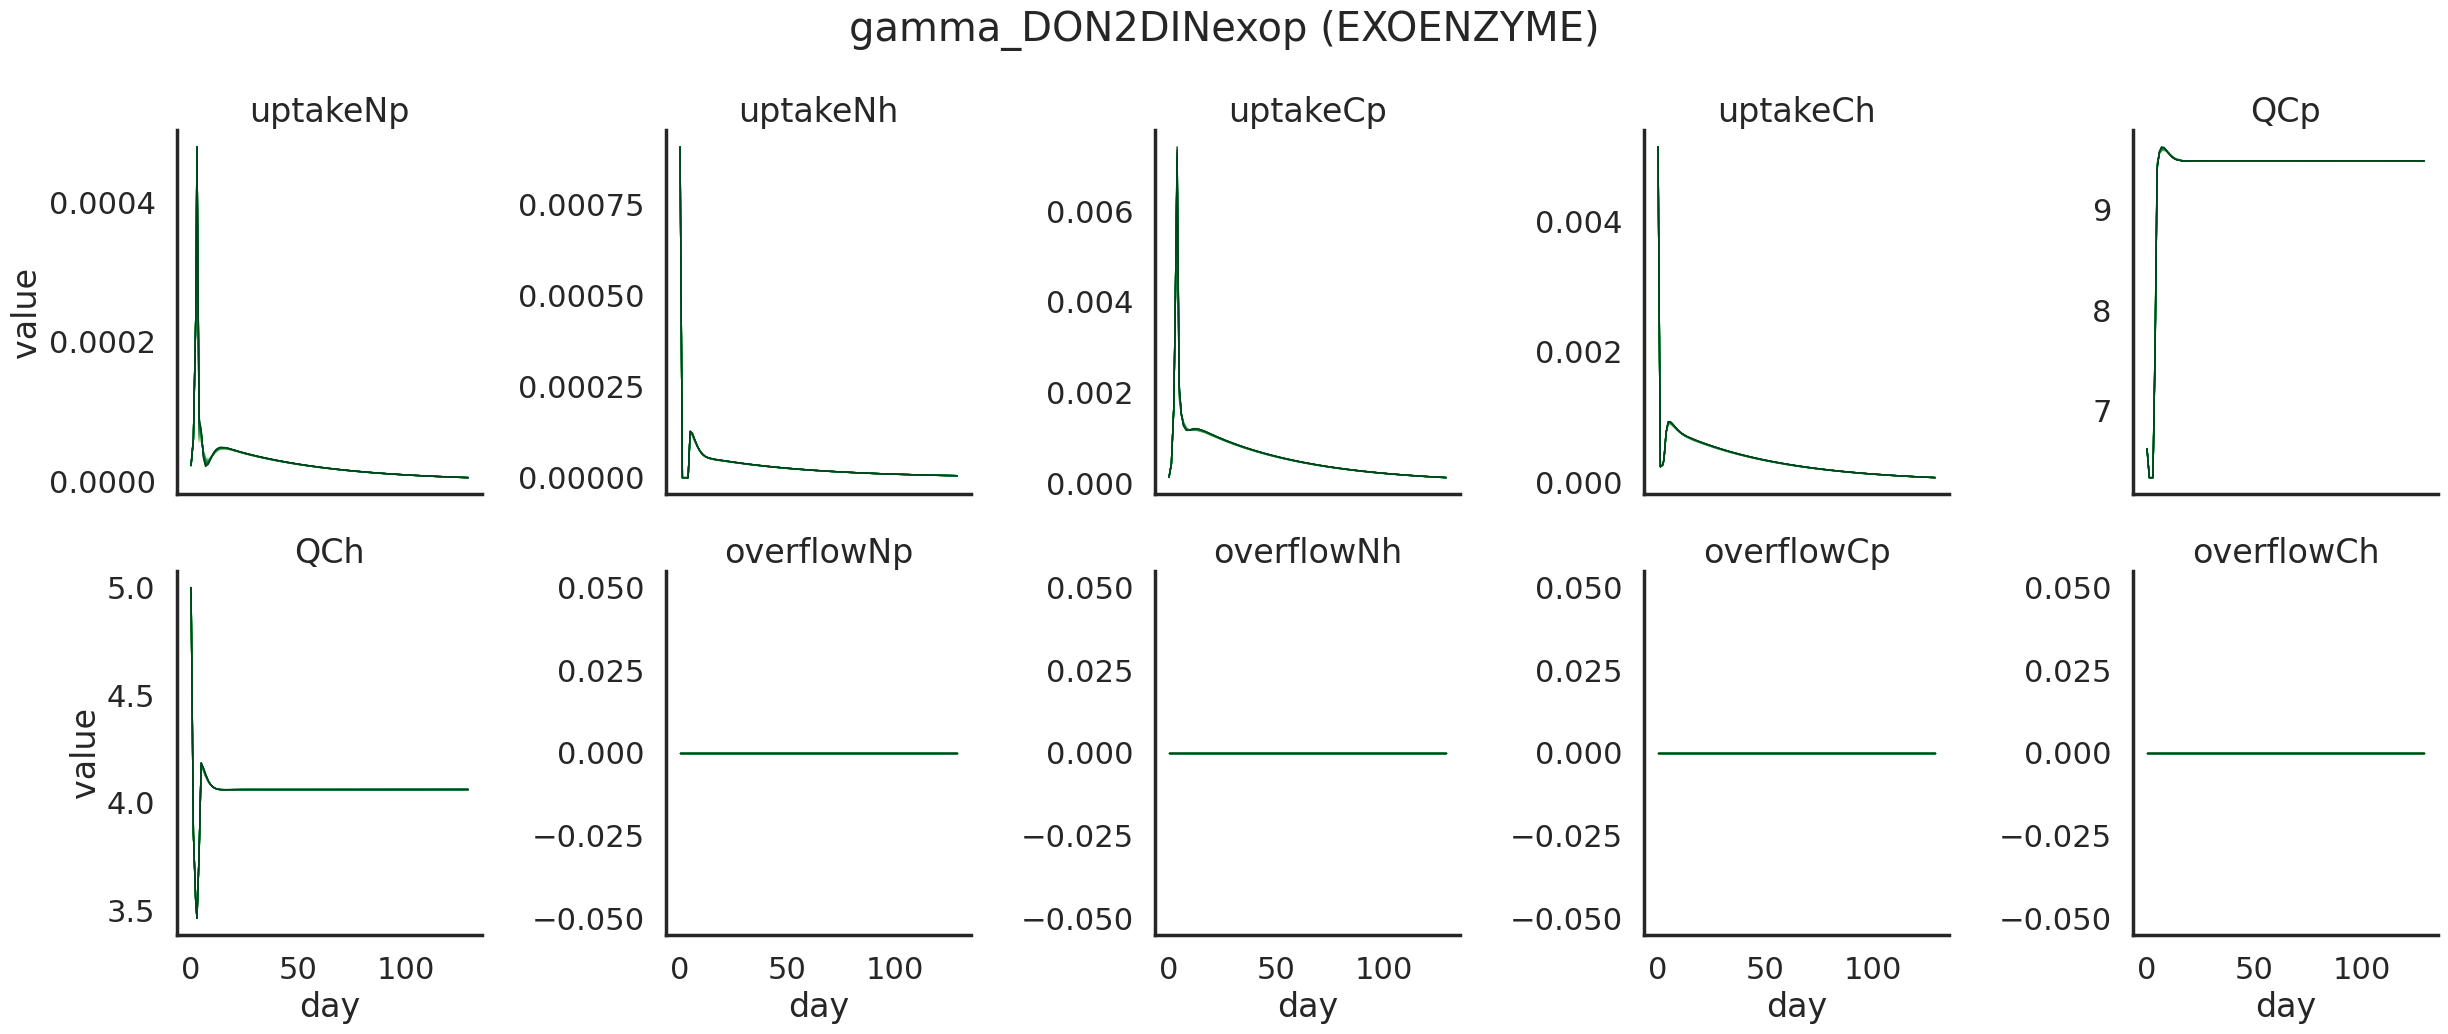

In [27]:
variables_to_track  = [
'uptakeNp','uptakeNh', 'uptakeCp', 'uptakeCh', 'QCp', 'QCh', 
 'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh', 
]

import matplotlib.colors as colors
organism_to_tune = 'PRO'
pro_min_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values('MIN', organism_to_tune)

for model in ['OVERFLOW', 'EXOENZYME']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    
    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    ~sdf.param.isin(pro_min_params_to_update) &
                    sdf['mode'].isin(['all'])
                   ]
    mcurdf = curdf.melt(
        id_vars=['run_id', 'day', 'param', 'paramval'],
        value_vars=variables_to_track,
        
    ).reset_index()

    for p in curdf.param.unique():
        
        g = sns.relplot(
            data=mcurdf.loc[mcurdf.param.isin([p])], x='day', y='value',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            col='variable', lw=1, legend=False, palette='Greens',
            col_wrap=5,
            hue='paramval', 
            facet_kws=dict(sharey=False),
        ).set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


In [36]:
sdf.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 't', 'day', 'gross_uptakeINp', 'gross_uptakeINh',
       'gross_uptakeONp', 'gross_uptakeONh', 'gross_uptakeICp',
       'gross_uptakeICh', 'gross_uptakeOCp', 'gross_uptakeOCh', 'uptakeNp',
       'uptakeNh', 'uptakeCp', 'uptakeCh', 'QCp', 'QCh', 'biosynthesisNp',
       'biosynthesisNh', 'respirationCp', 'respirationCh',
       'biomass_breakdownCp', 'biomass_breakdownCh', 'overflowNp',
       'overflowNh', 'overflowCp', 'overflowCh', 'Bp[C]', 'Bptotal[N]',
       'Bptotal[C]', 'log_Bptotal[N]', 'log_Bptotal[C]', 'Bh[C]', 'Bhtotal[N]',
       'Bhtotal[C]', 'run_id', 'media', 'mode', 'model', 'run', 'param',
       'paramval'],
      dtype='object')

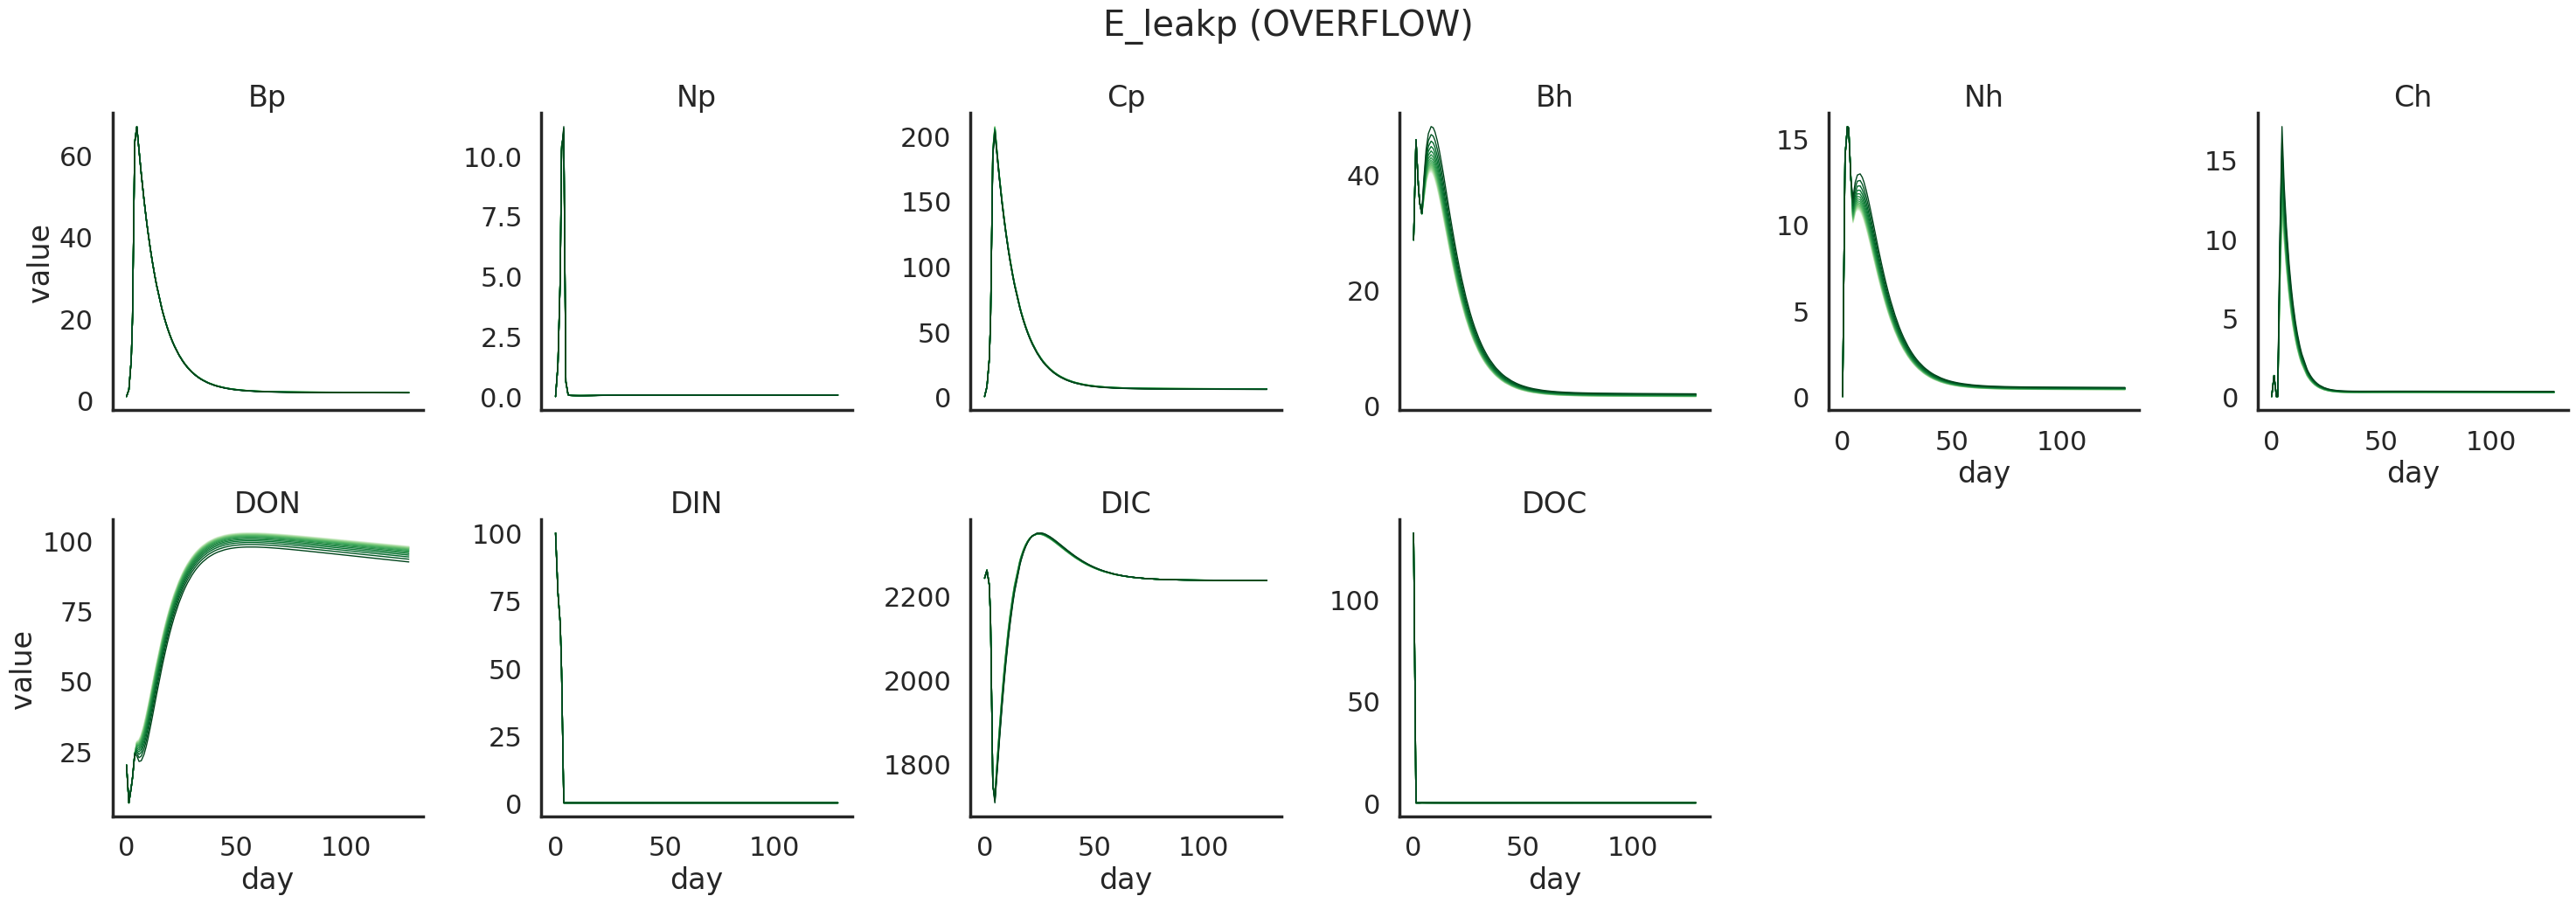

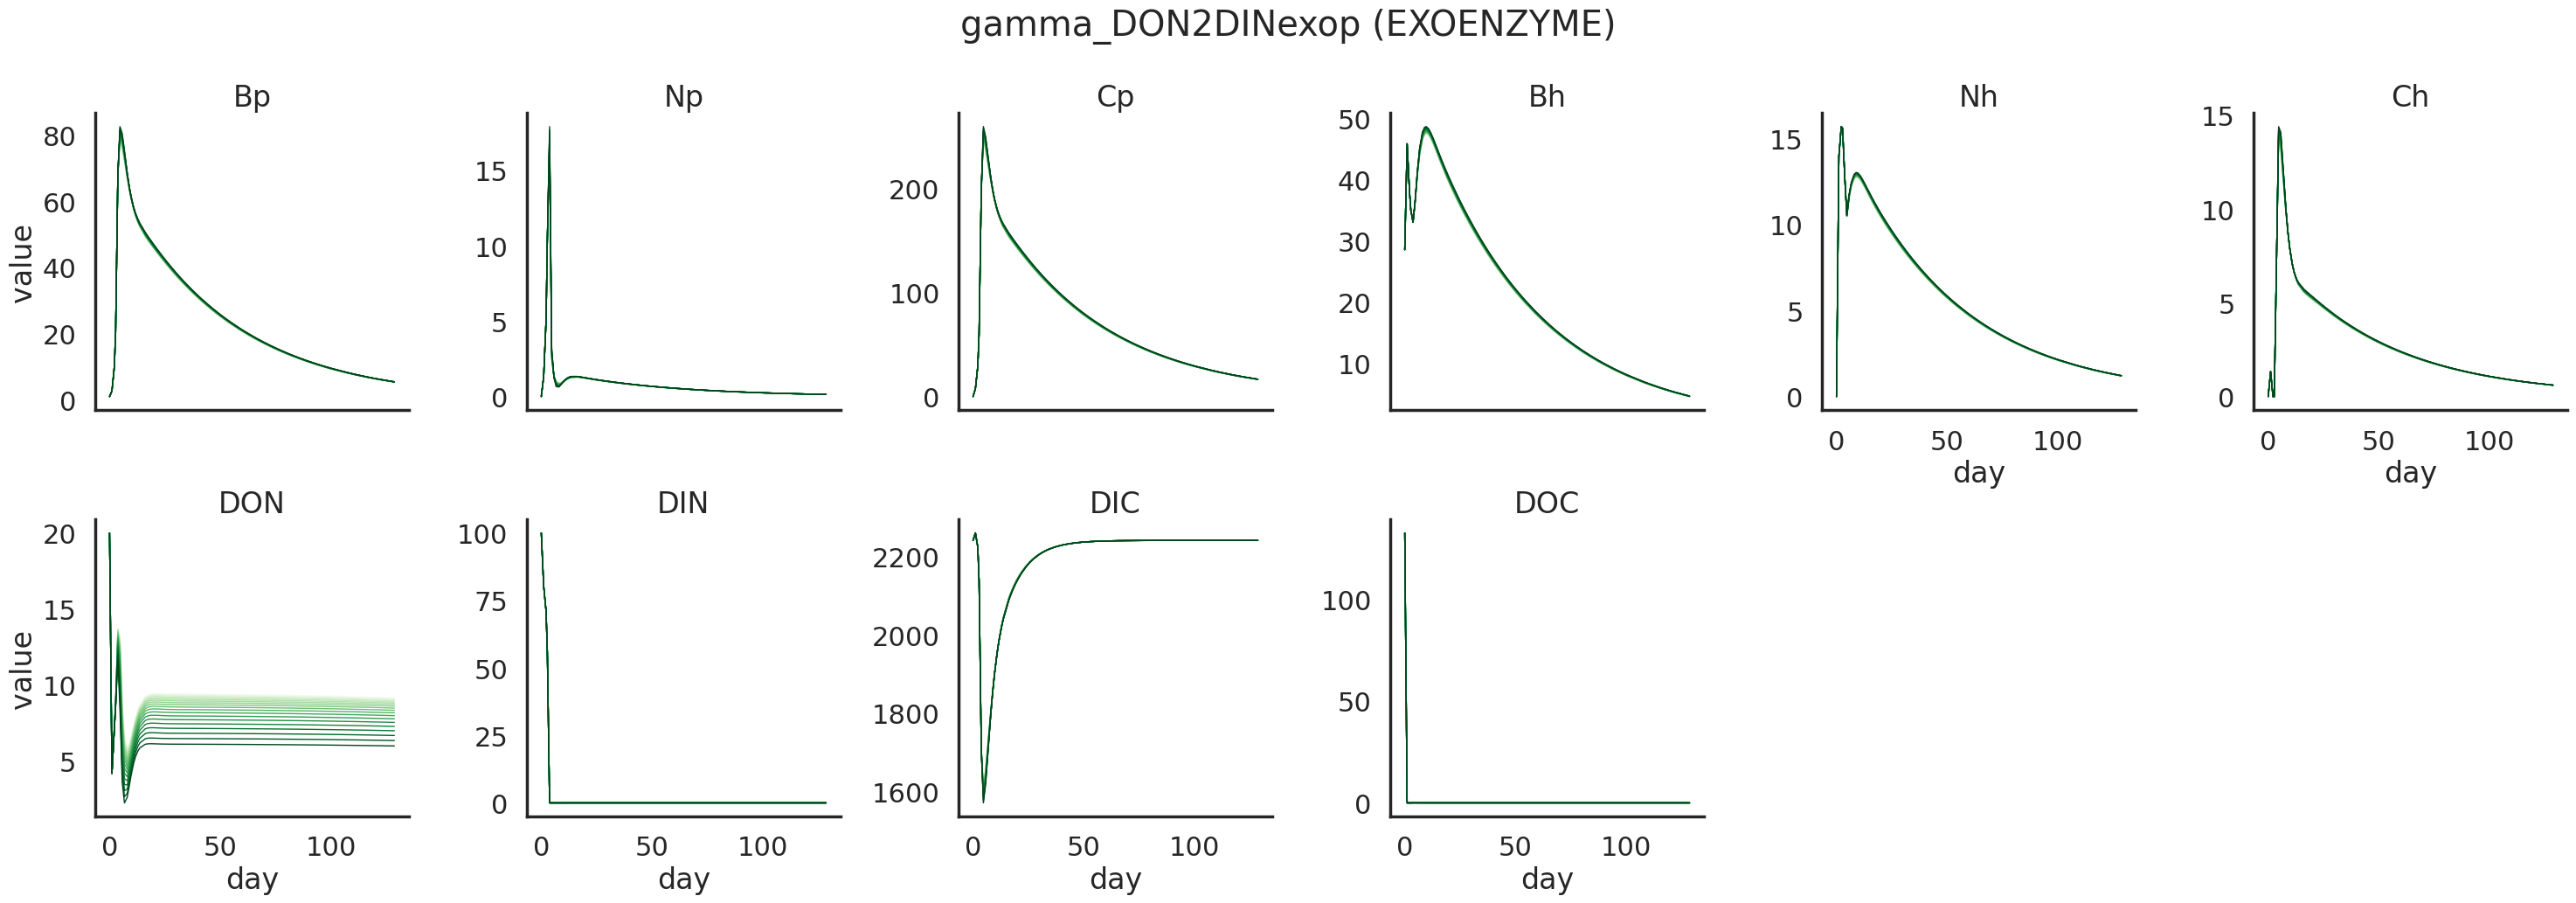

In [37]:
variables_to_track  = [
'Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch','DON','DIN', 'DIC', 'DOC' 
]

import matplotlib.colors as colors
organism_to_tune = 'PRO'
pro_min_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values('MIN', organism_to_tune)

for model in ['OVERFLOW', 'EXOENZYME']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    
    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    ~sdf.param.isin(pro_min_params_to_update) &
                    sdf['mode'].isin(['all'])
                   ]
    mcurdf = curdf.melt(
        id_vars=['run_id', 'day', 'param', 'paramval'],
        value_vars=variables_to_track,
        
    ).reset_index()

    for p in curdf.param.unique():
        
        g = sns.relplot(
            data=mcurdf.loc[mcurdf.param.isin([p])], x='day', y='value',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            col='variable', lw=1, legend=False, palette='Greens',
            col_wrap=6,
            hue='paramval', 
            facet_kws=dict(sharey=False),
        ).set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


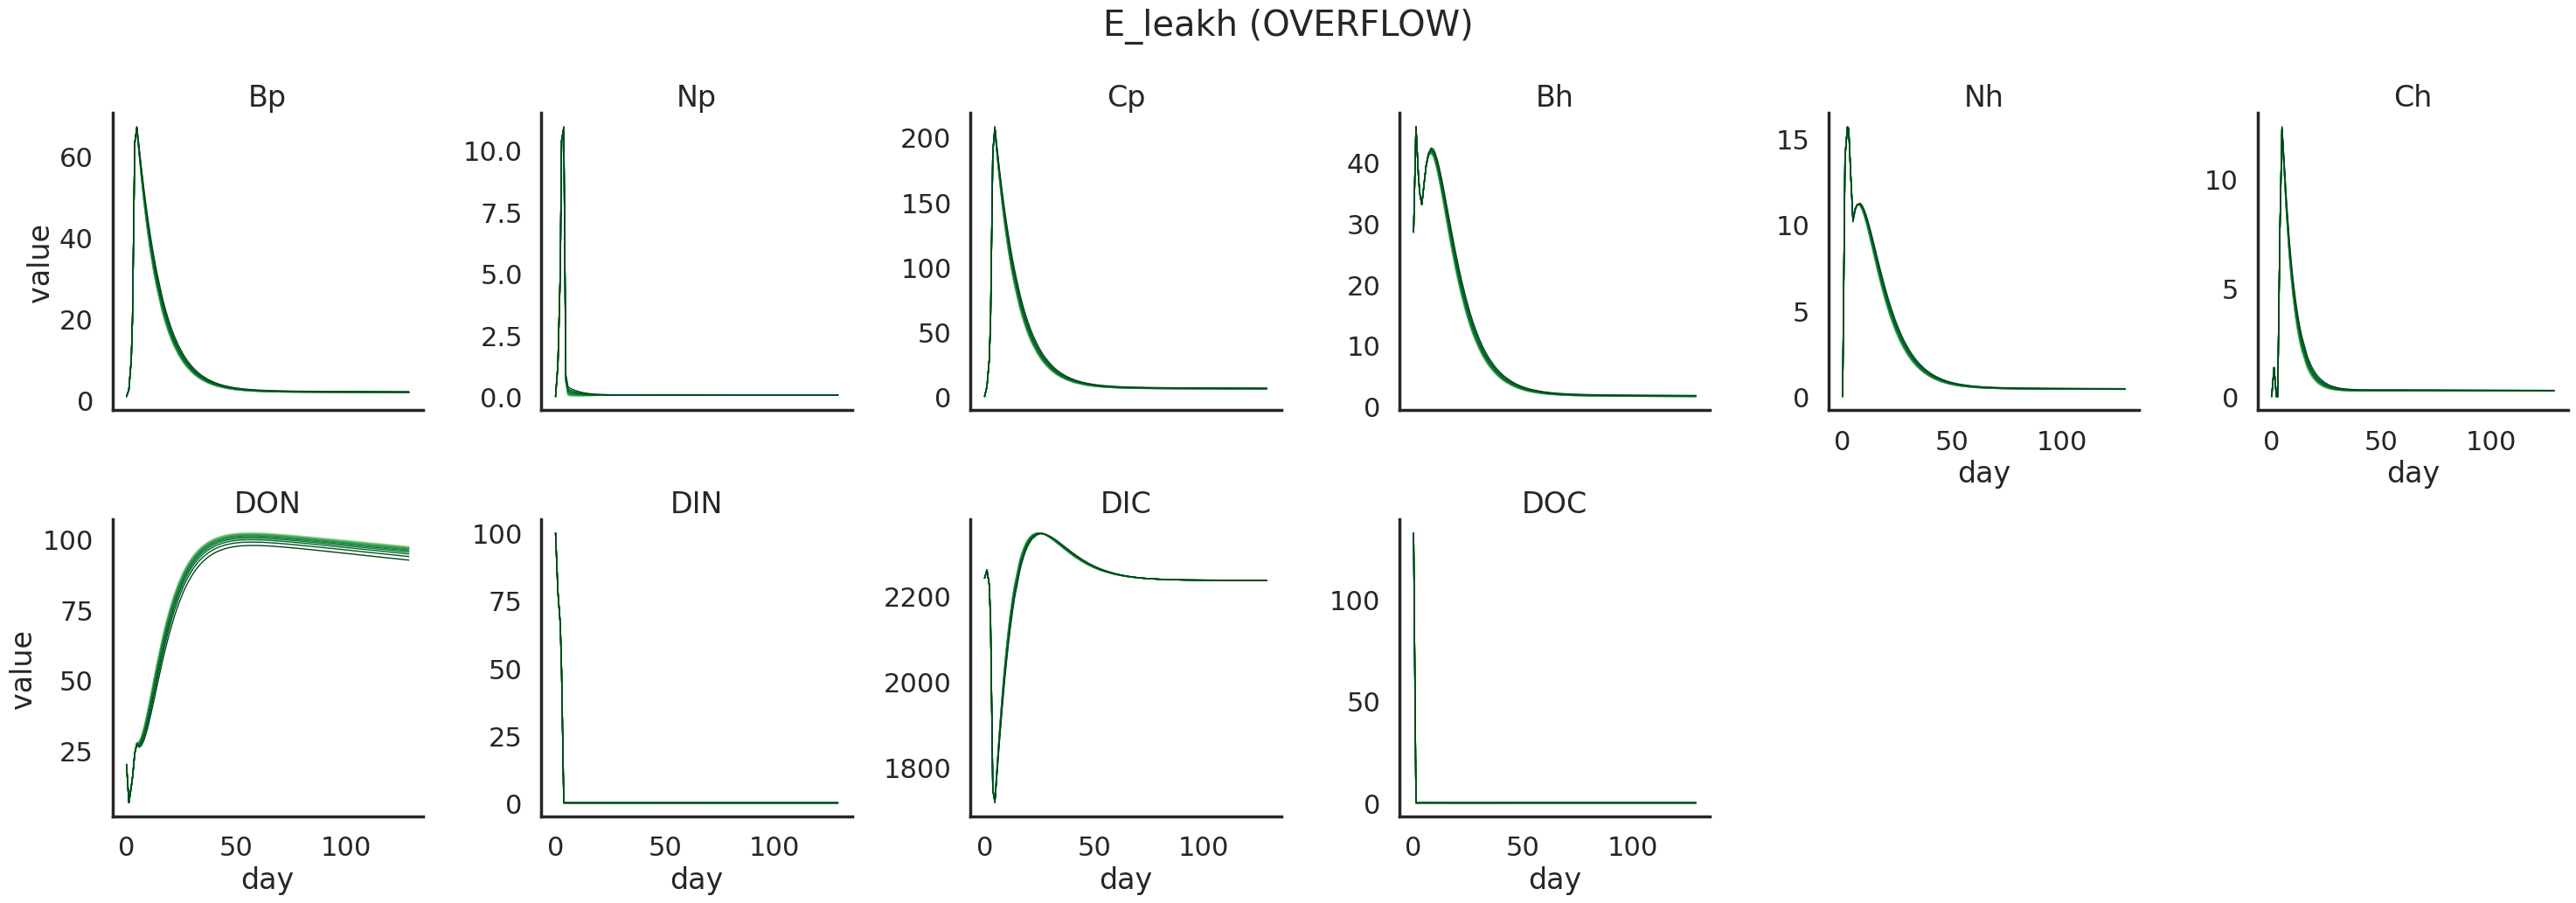

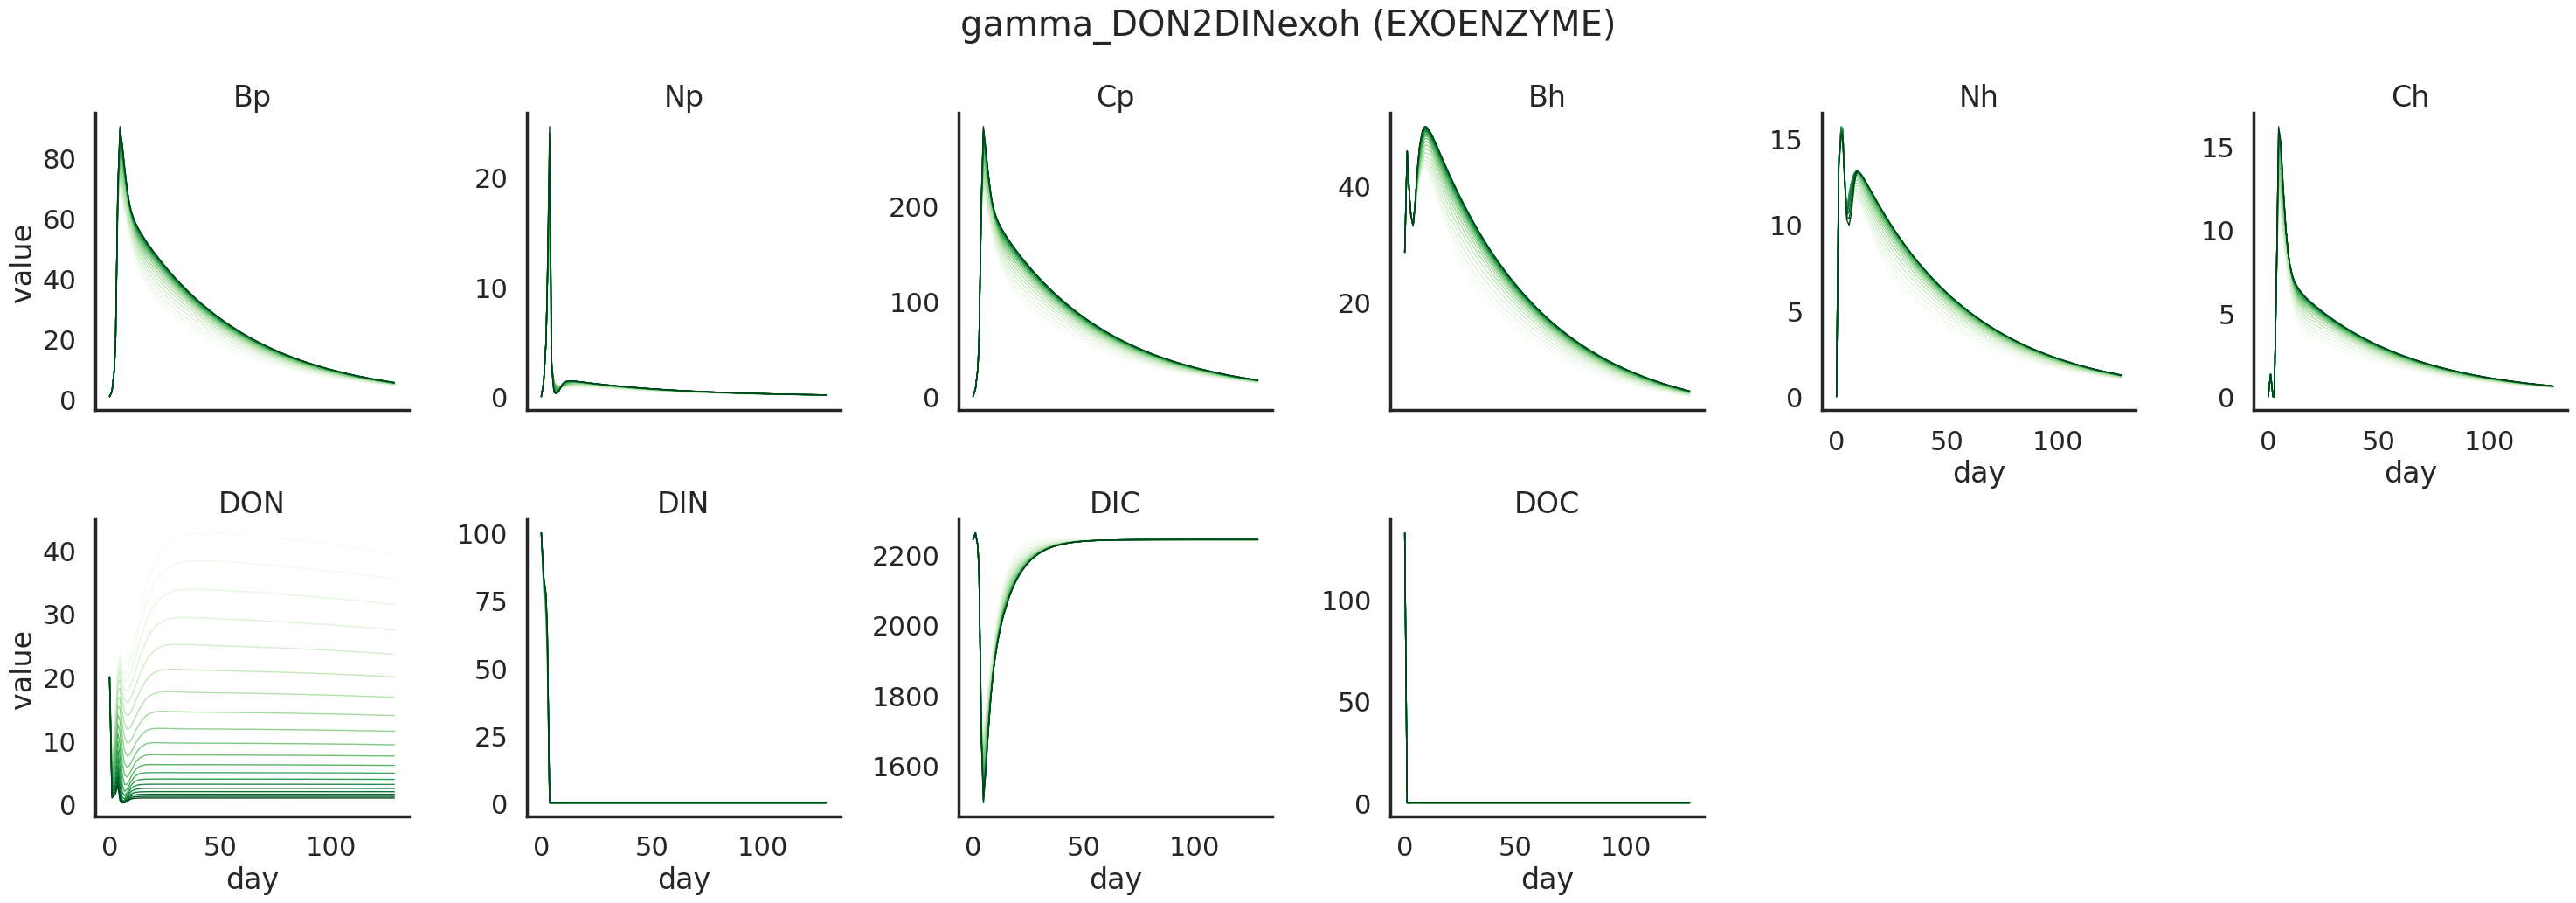

In [38]:
variables_to_track  = [
'Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch','DON','DIN', 'DIC', 'DOC' 
]

import matplotlib.colors as colors
organism_to_tune = 'HET'
pro_min_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values('MIN', organism_to_tune)

for model in ['OVERFLOW', 'EXOENZYME']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    
    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    ~sdf.param.isin(pro_min_params_to_update) &
                    sdf['mode'].isin(['all'])
                   ]
    mcurdf = curdf.melt(
        id_vars=['run_id', 'day', 'param', 'paramval'],
        value_vars=variables_to_track,
        
    ).reset_index()

    for p in curdf.param.unique():
        
        g = sns.relplot(
            data=mcurdf.loc[mcurdf.param.isin([p])], x='day', y='value',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            col='variable', lw=1, legend=False, palette='Greens',
            col_wrap=6,
            hue='paramval', 
            facet_kws=dict(sharey=False),
        ).set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


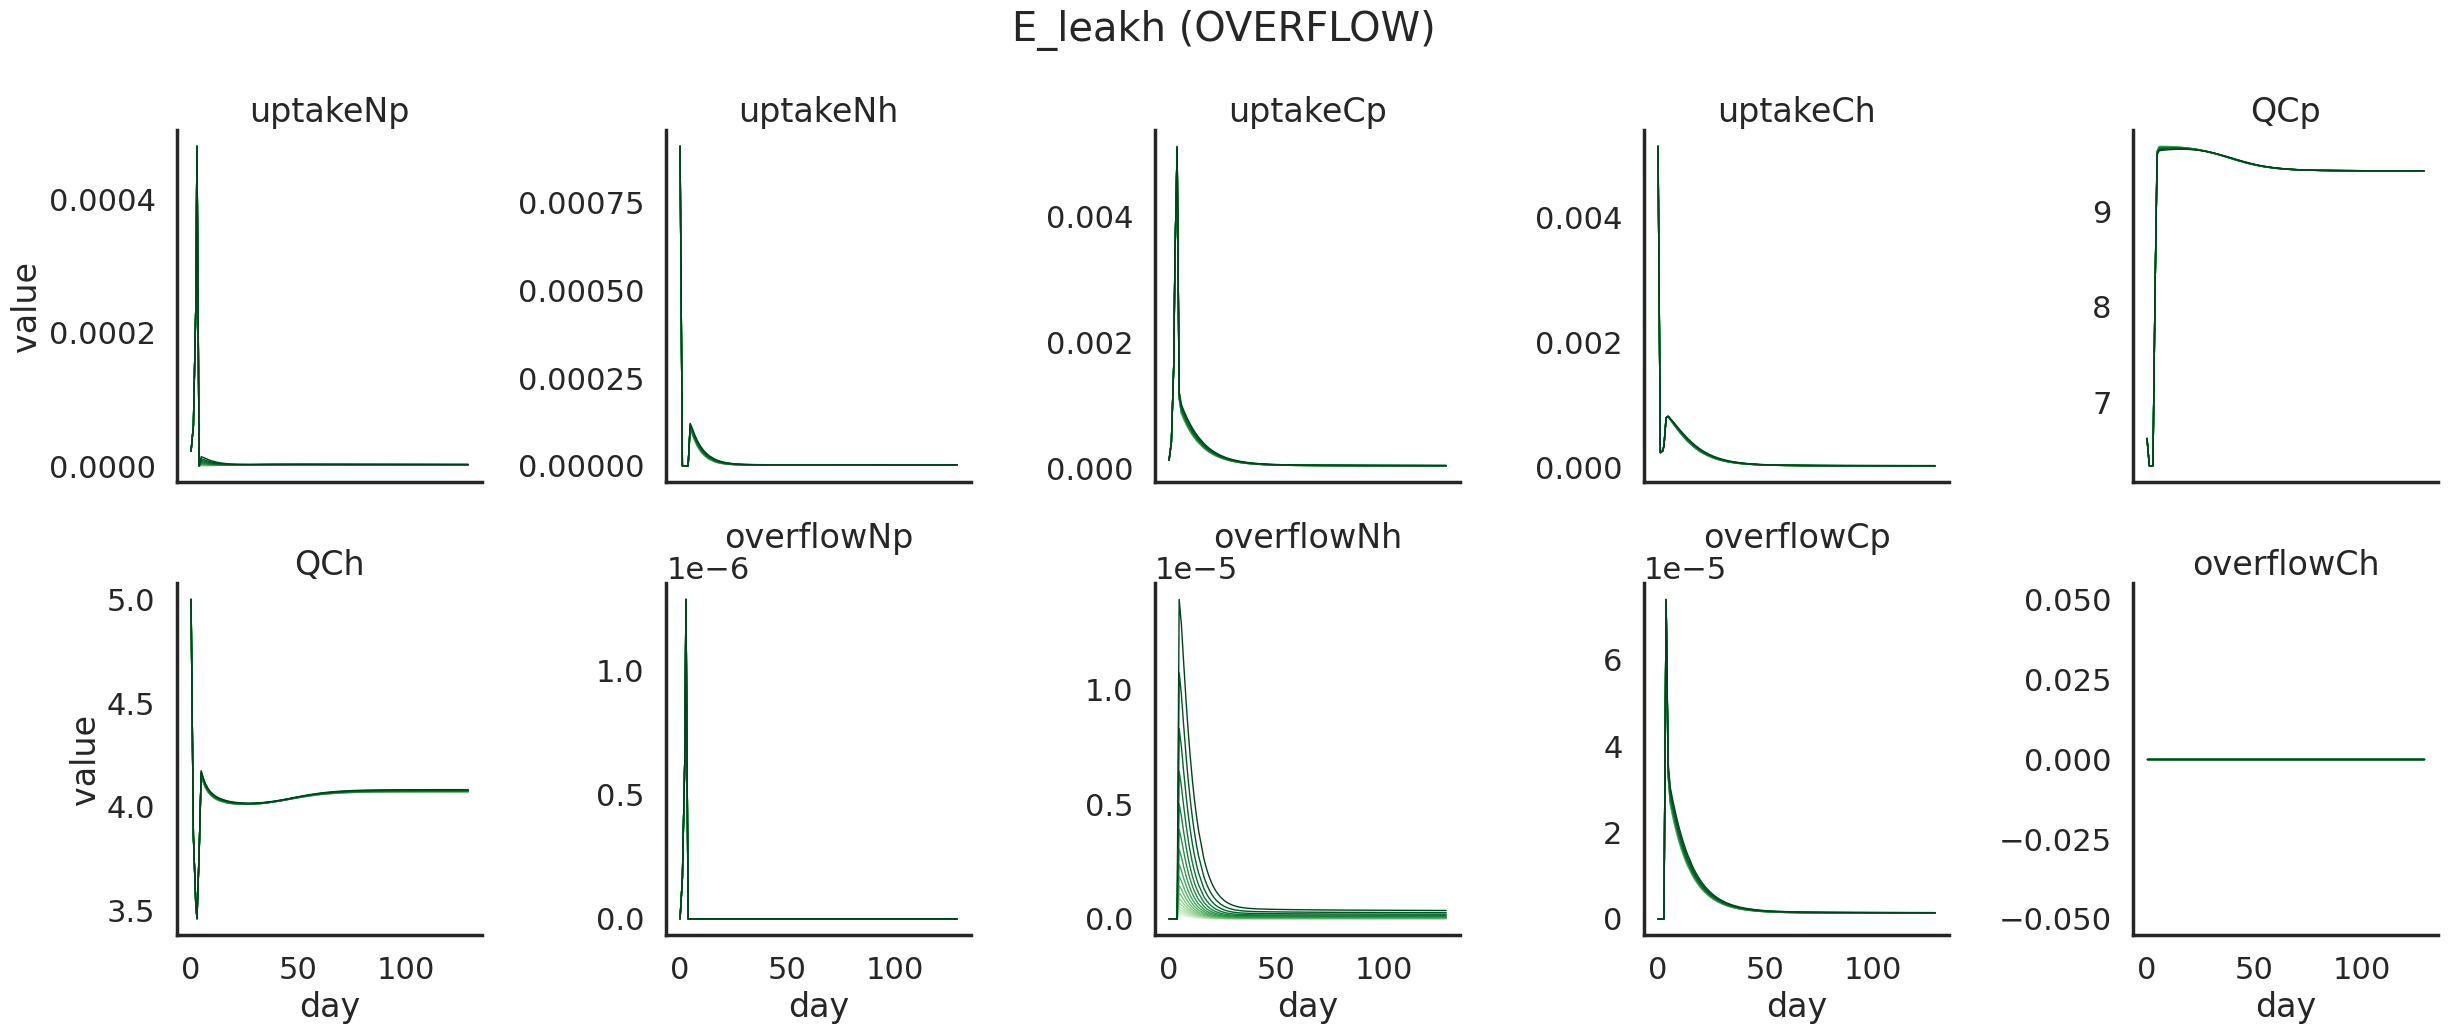

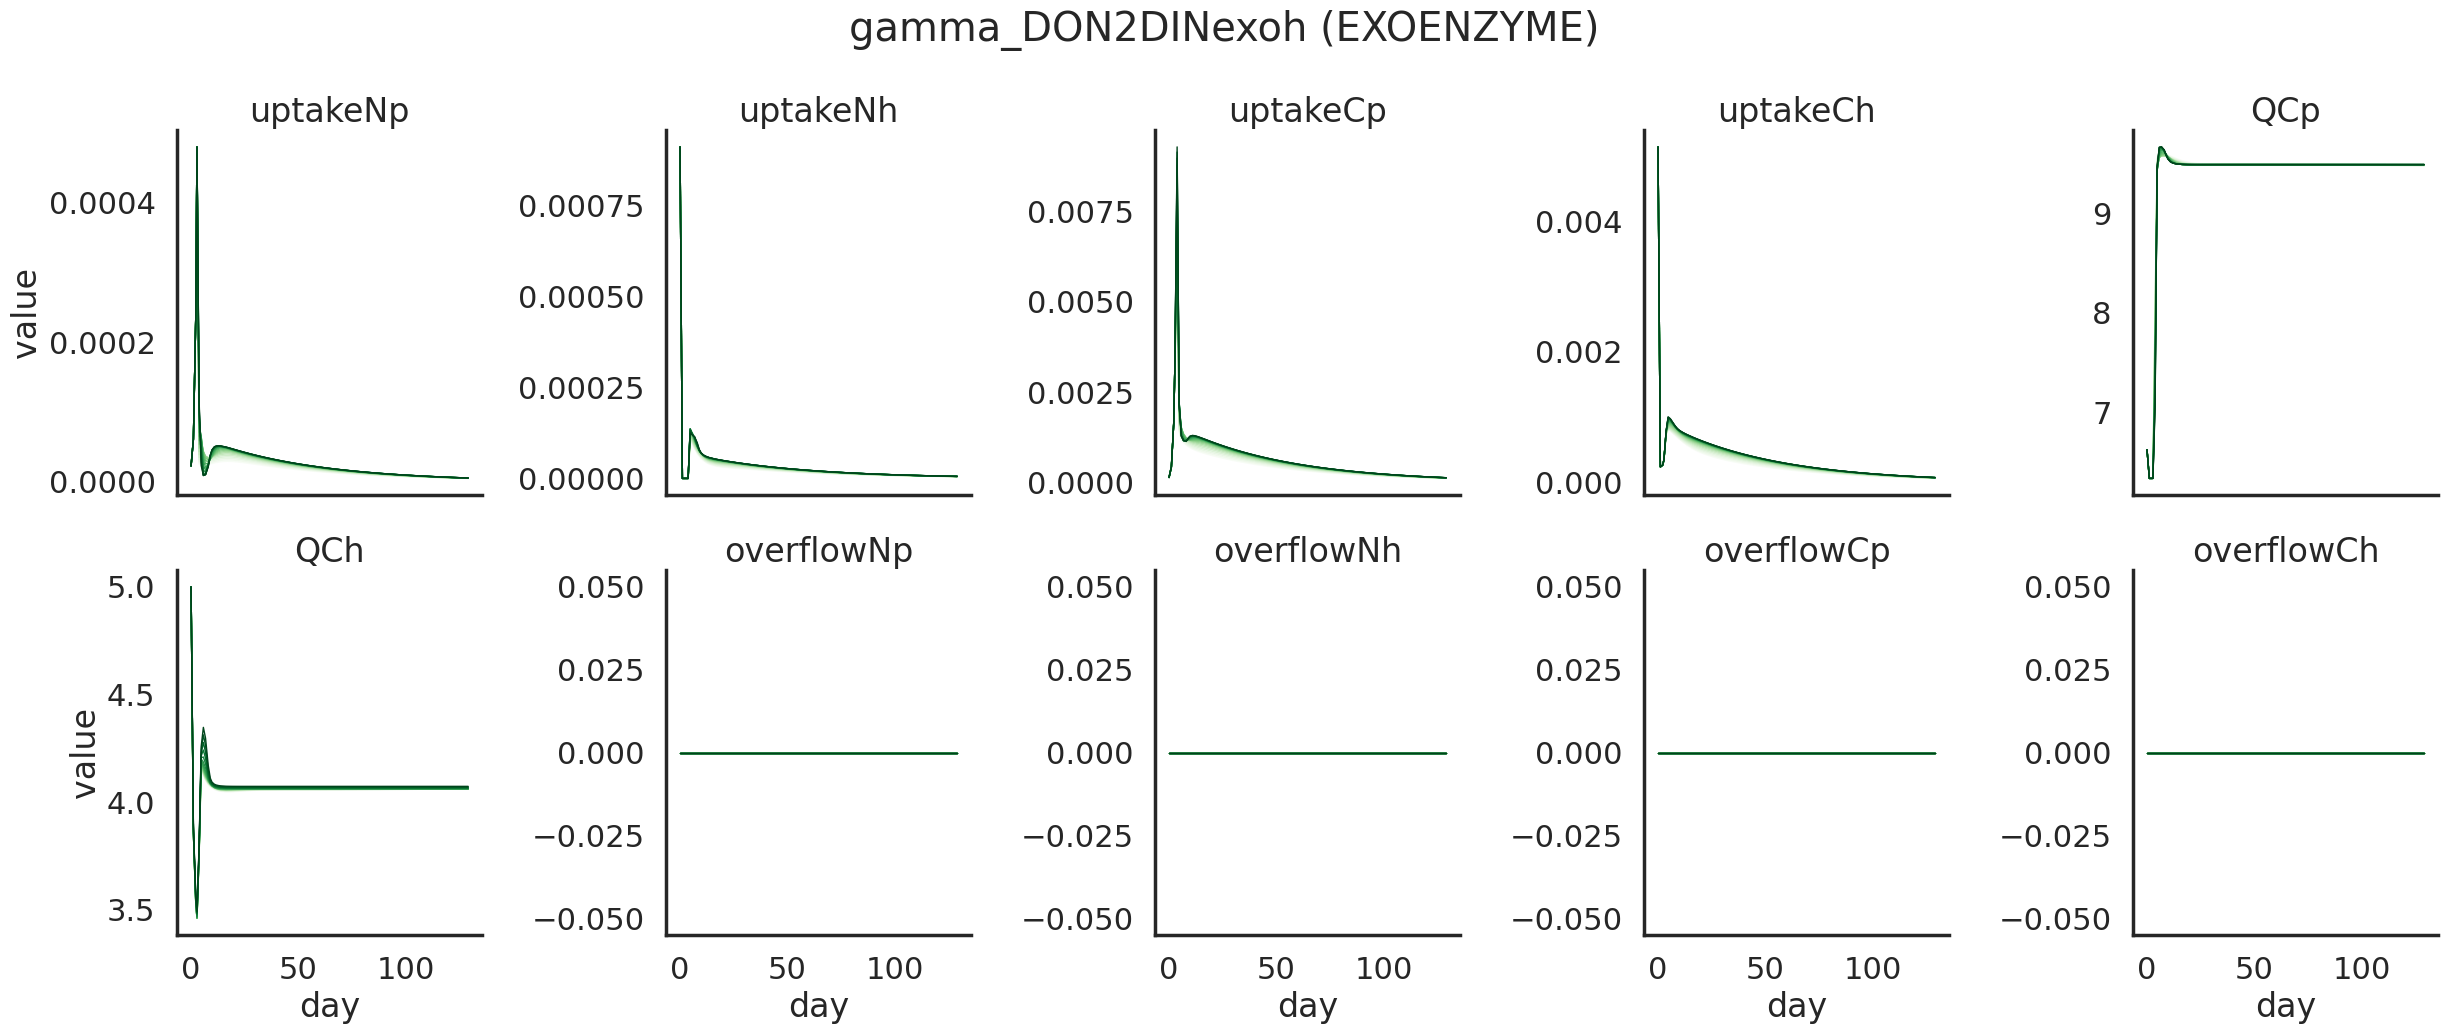

In [30]:
variables_to_track  = [
'uptakeNp','uptakeNh', 'uptakeCp', 'uptakeCh', 'QCp', 'QCh', 
 'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh', 
]

import matplotlib.colors as colors
organism_to_tune = 'HET'
pro_min_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values('MIN', organism_to_tune)

for model in ['OVERFLOW', 'EXOENZYME']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    
    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    ~sdf.param.isin(pro_min_params_to_update) &
                    sdf['mode'].isin(['all'])
                   ]
    mcurdf = curdf.melt(
        id_vars=['run_id', 'day', 'param', 'paramval'],
        value_vars=variables_to_track,
        
    ).reset_index()

    for p in curdf.param.unique():
        
        g = sns.relplot(
            data=mcurdf.loc[mcurdf.param.isin([p])], x='day', y='value',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            col='variable', lw=1, legend=False, palette='Greens',
            col_wrap=5,
            hue='paramval', 
            facet_kws=dict(sharey=False),
        ).set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


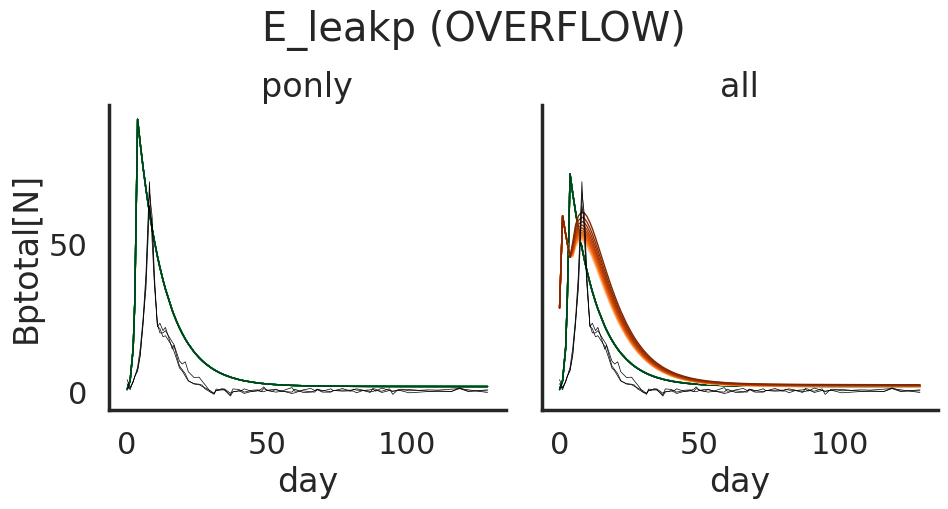

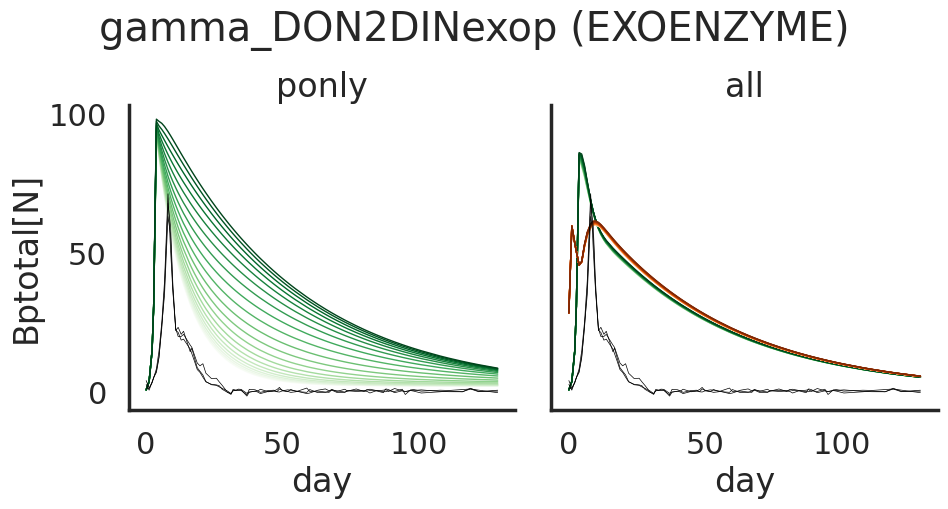

In [31]:

import matplotlib.colors as colors
organism_to_tune = 'PRO'
pro_min_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values('MIN', organism_to_tune)

for model in ['OVERFLOW', 'EXOENZYME']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    
    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    ~sdf.param.isin(pro_min_params_to_update) 
                    
                   ]
    for p in curdf.param.unique():
        
        g = sns.relplot(
            data=curdf.loc[curdf.param.isin([p])], x='day', y='Bptotal[N]',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            col='mode', lw=1, legend=False, palette='Greens',
            col_order=['ponly', 'all'],
            hue='paramval', 
        )
        for col_val, ax in g.axes_dict.items():
            if col_val == 'all':
                sns.lineplot(
                    data=curdf.loc[curdf.param.isin([p]) & curdf['mode'].isin(['all'])], 
                    x='day', y='Bhtotal[N]',
                    units='run_id', estimator=None,
                     hue_norm=colors.LogNorm(),
                     lw=1, legend=False, palette='Oranges',
                    hue='paramval', 
                )
            datadf = refdf 
            sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='black',

                         legend=False
                        )
        g.set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


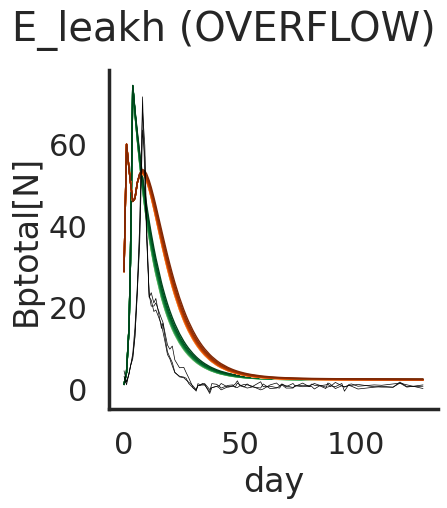

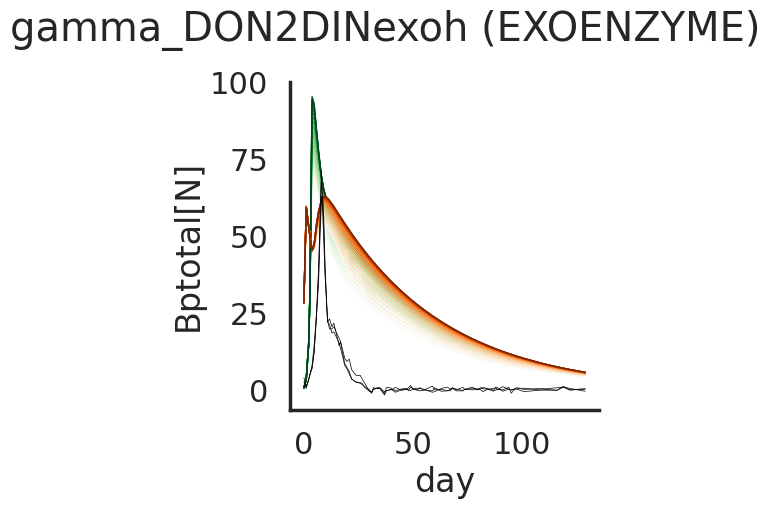

In [32]:

import matplotlib.colors as colors
organism_to_tune = 'HET'
pro_min_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values('MIN', organism_to_tune)

for model in ['OVERFLOW', 'EXOENZYME']: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    
    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    ~sdf.param.isin(pro_min_params_to_update) &
                    sdf['mode'].isin(['all'])
                   ]
    for p in curdf.param.unique():
        
        g = sns.relplot(
            data=curdf.loc[curdf.param.isin([p])], x='day', y='Bptotal[N]',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            #col='mode', 
            lw=1, legend=False, palette='Greens',
            #col_order=['ponly', 'all'],
            hue='paramval', 
        )
        #for col_val, ax in g.axes_dict.items():
        #    if col_val == 'all':
        sns.lineplot(
            data=curdf.loc[curdf.param.isin([p]) & curdf['mode'].isin(['all'])], 
            x='day', y='Bhtotal[N]',
            units='run_id', estimator=None,
             hue_norm=colors.LogNorm(),
             lw=1, legend=False, palette='Oranges',
            hue='paramval', 
        )
        datadf = refdf 
        sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
        units='Sample', estimator=None, lw=0.5, color='black',

                         legend=False
                        )
        g.set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


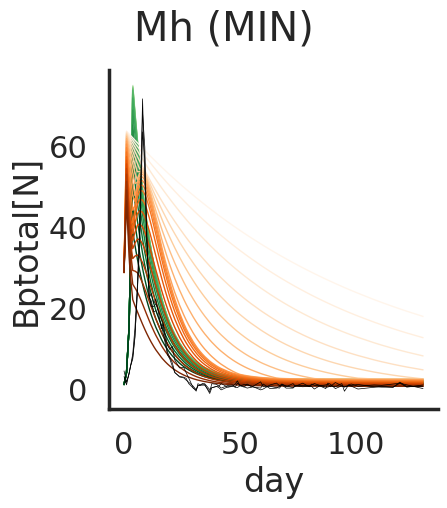

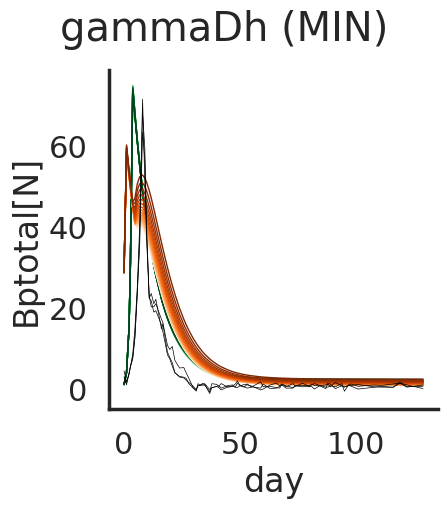

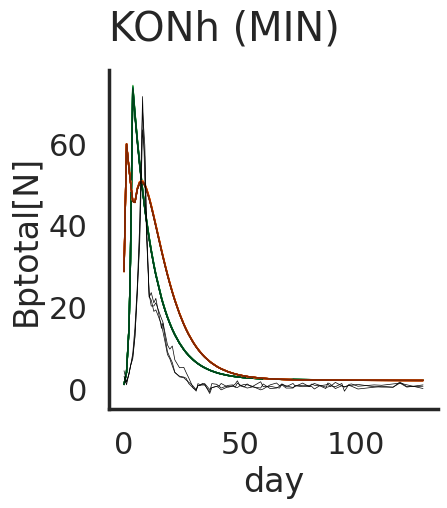

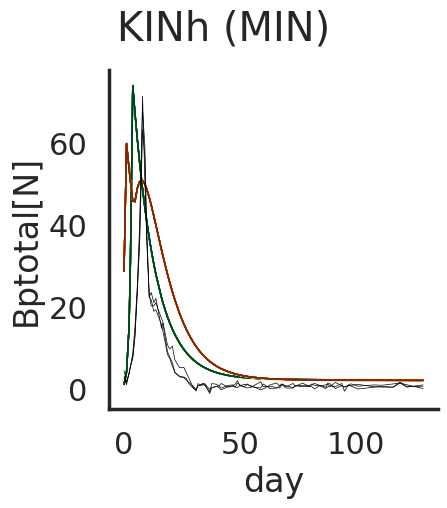

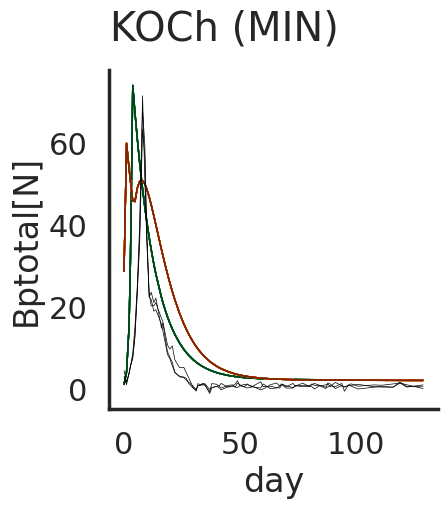

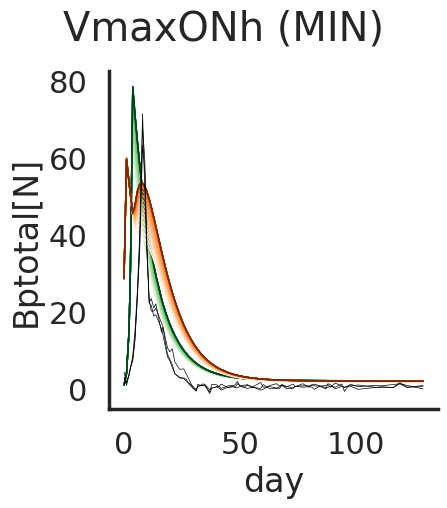

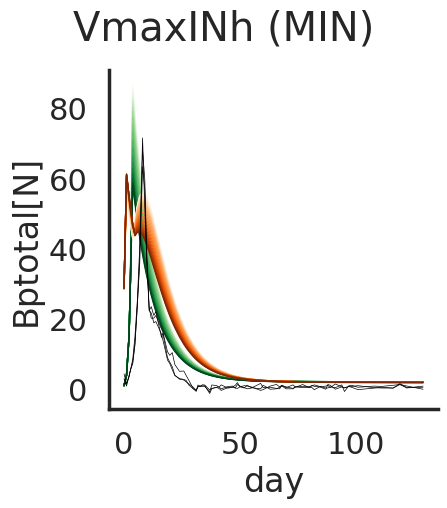

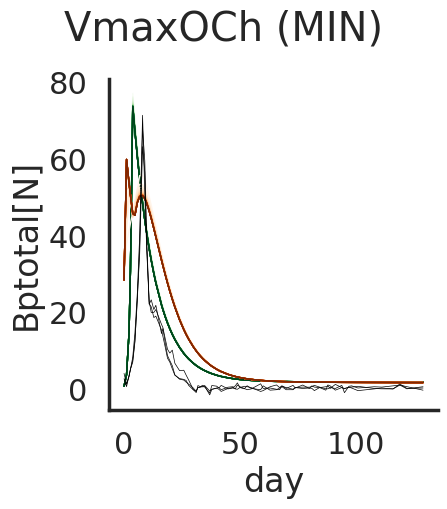

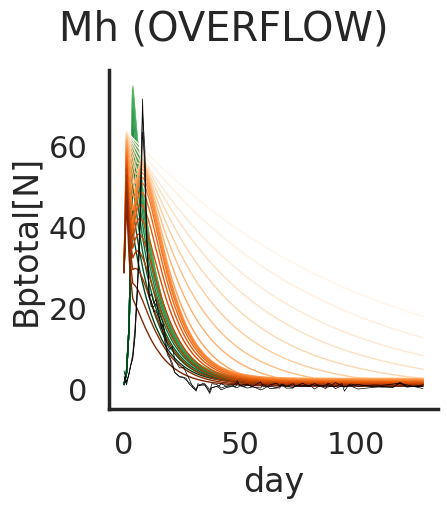

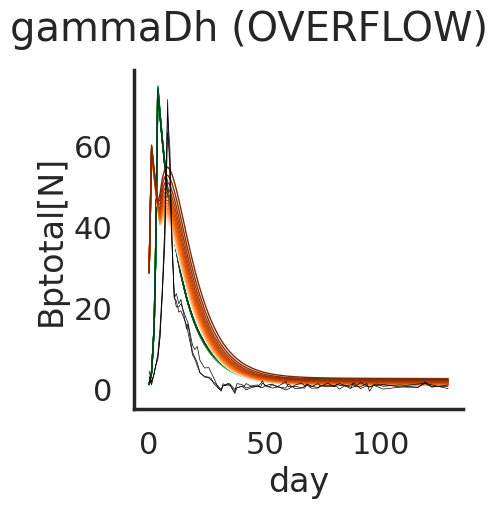

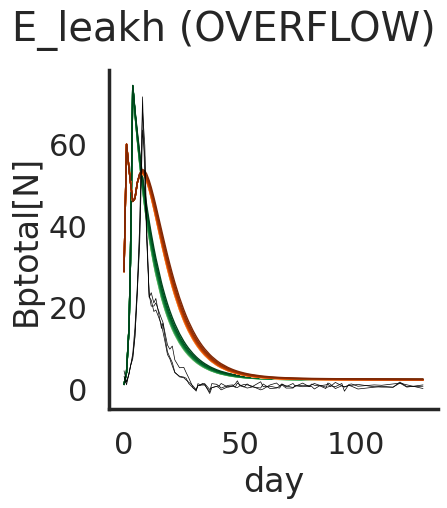

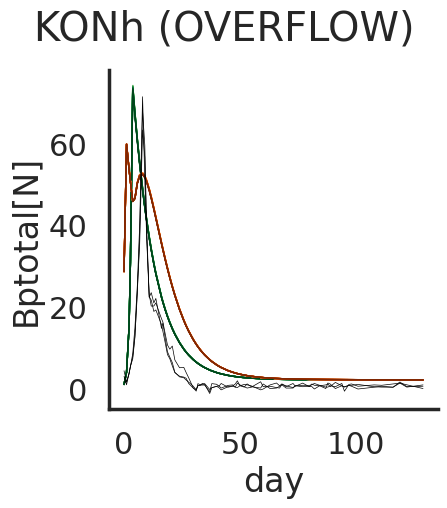

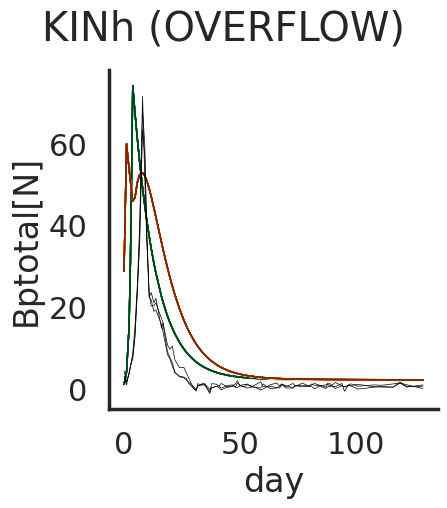

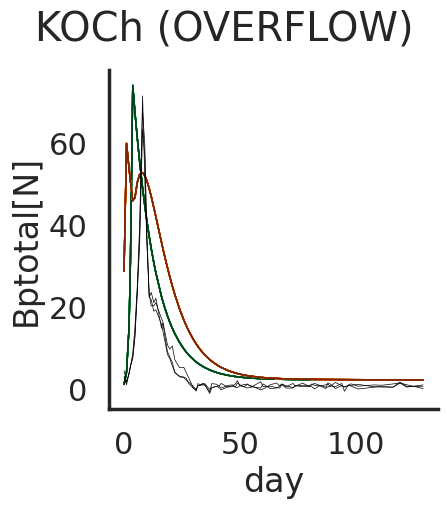

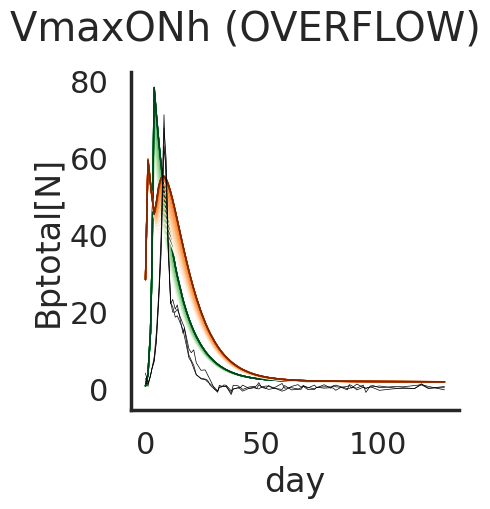

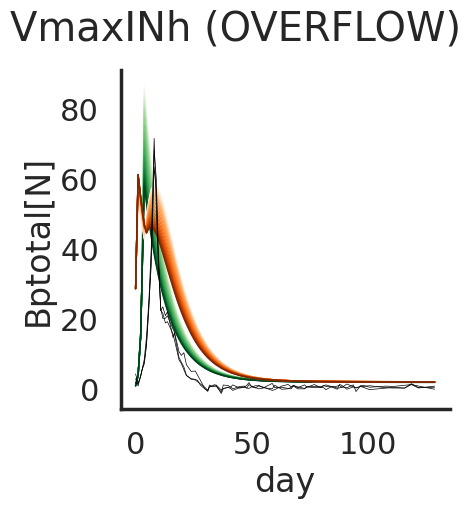

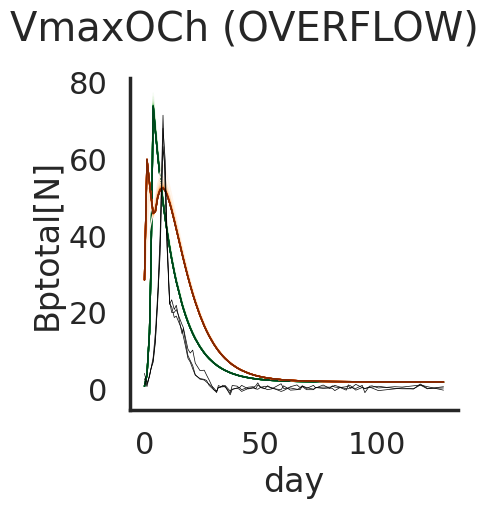

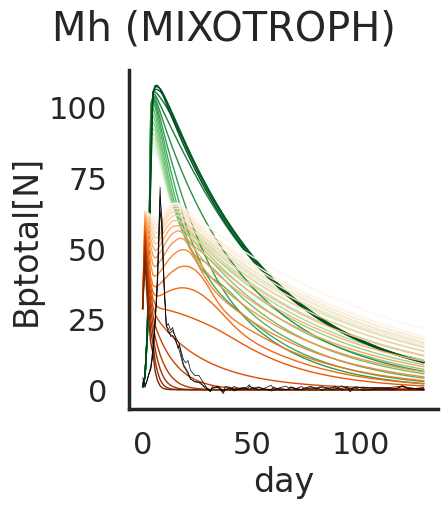

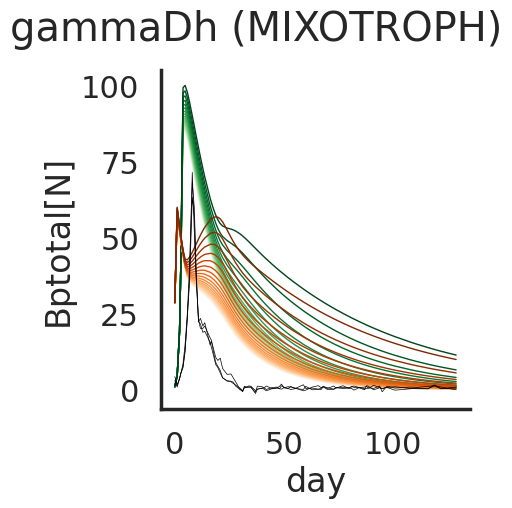

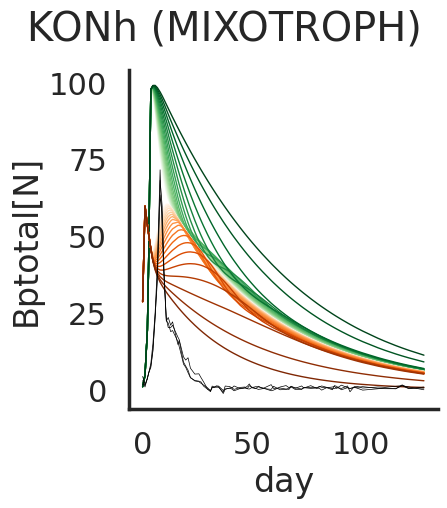

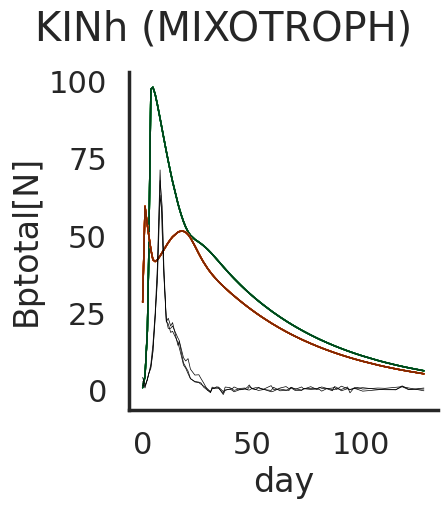

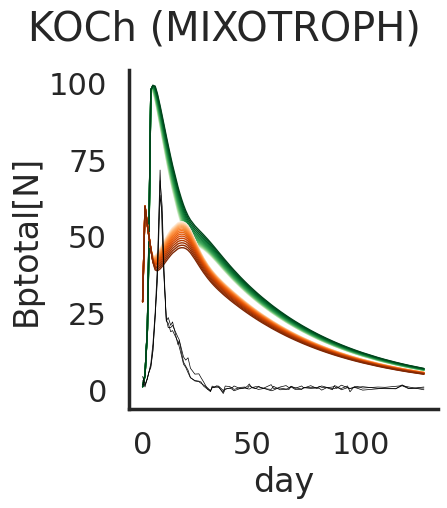

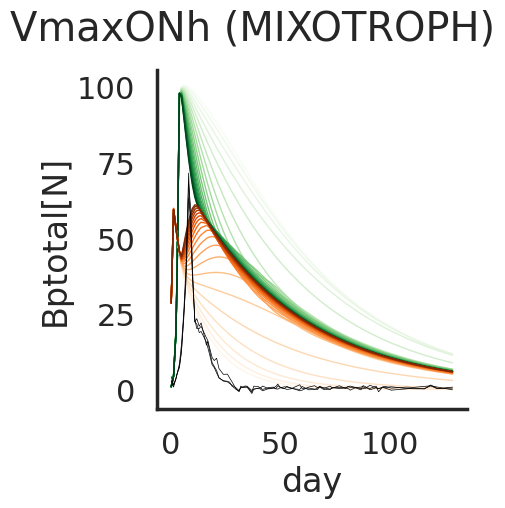

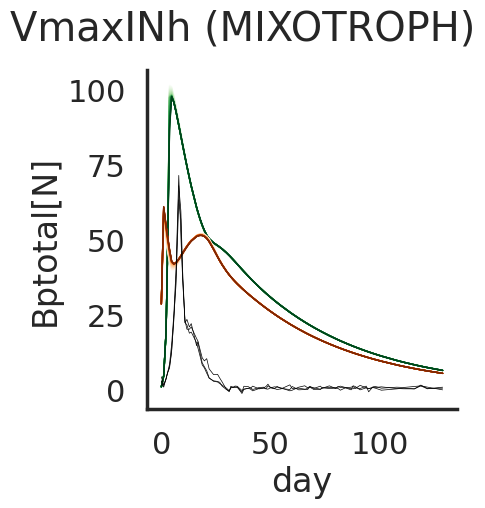

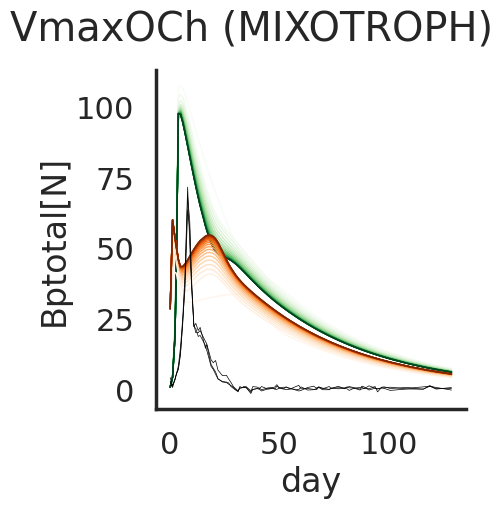

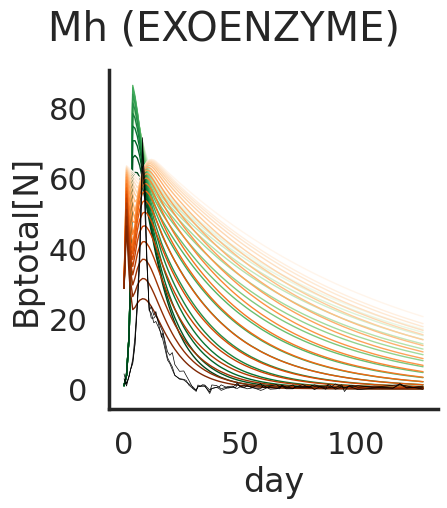

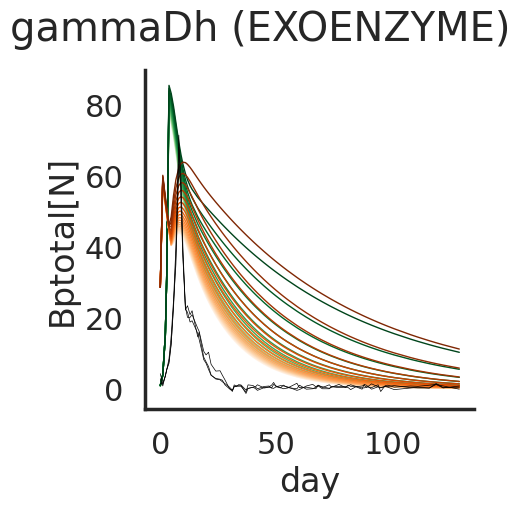

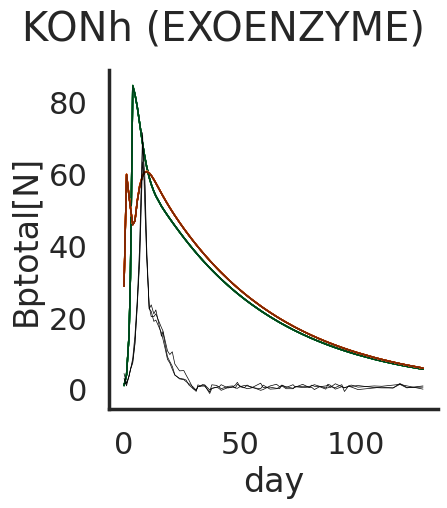

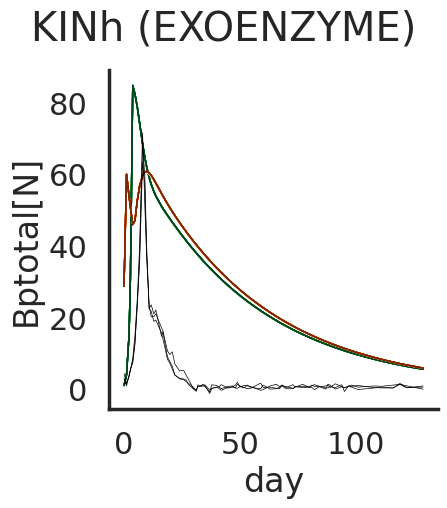

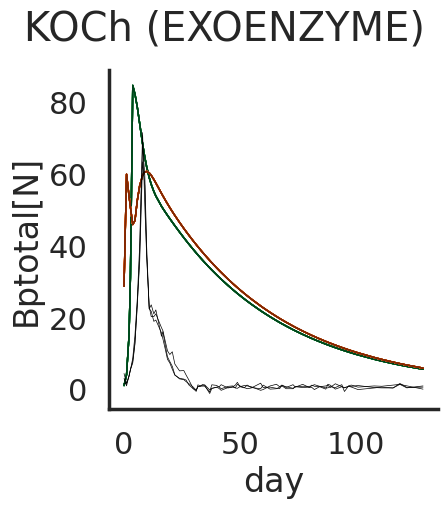

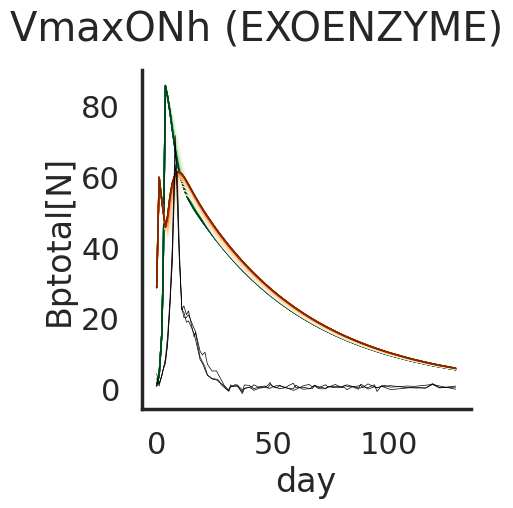

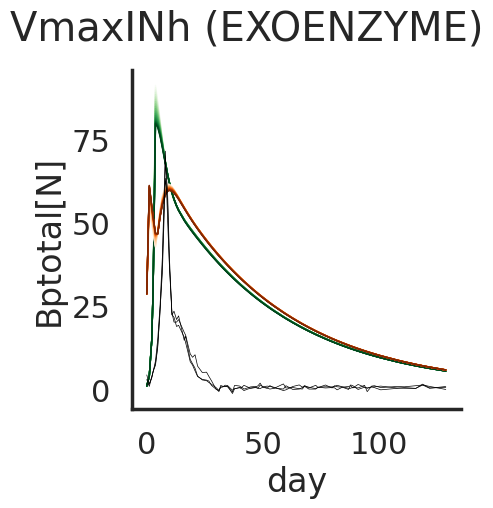

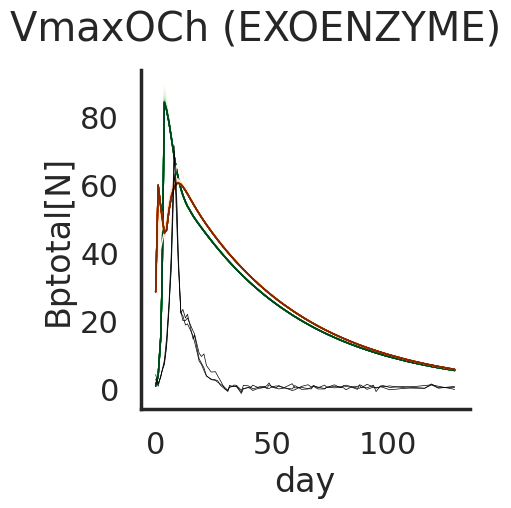

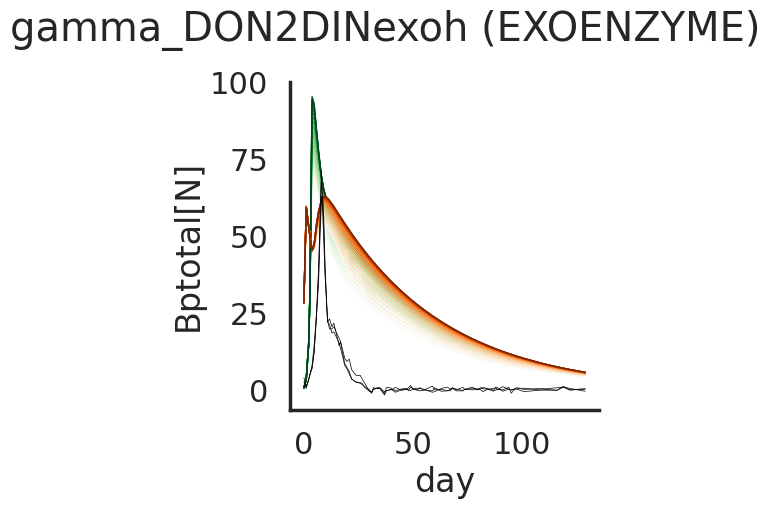

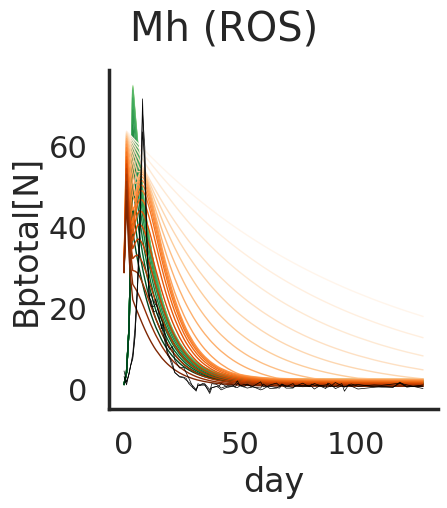

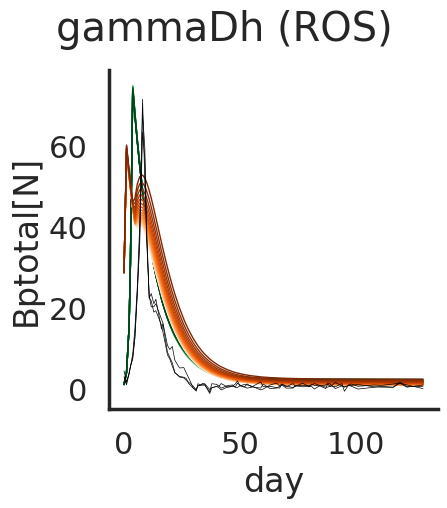

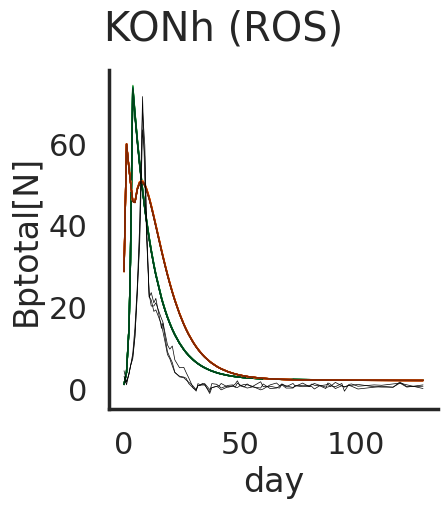

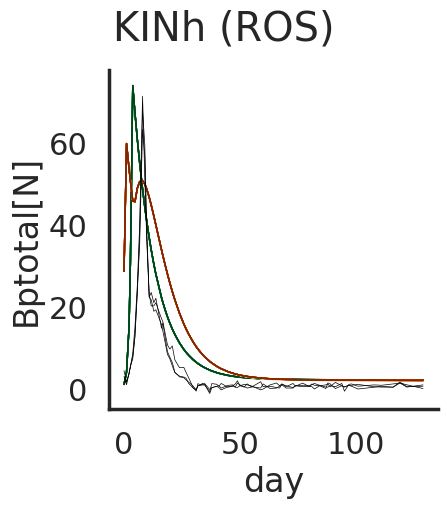

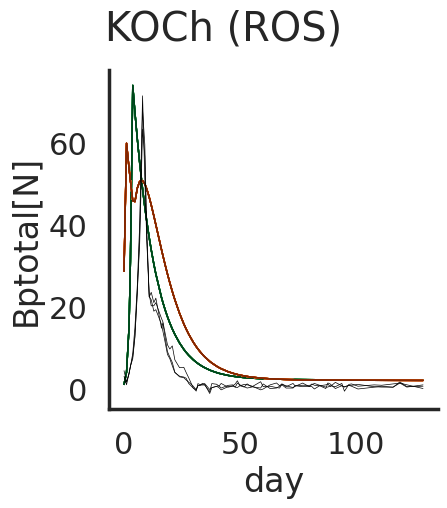

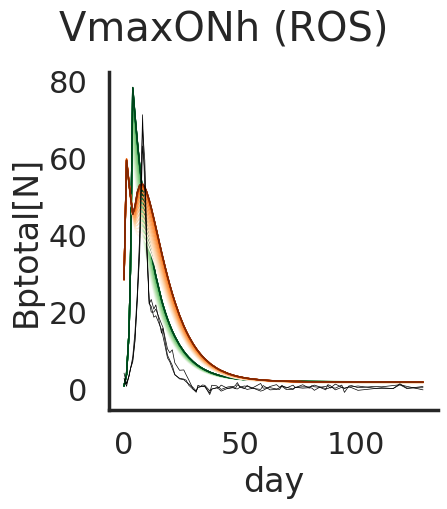

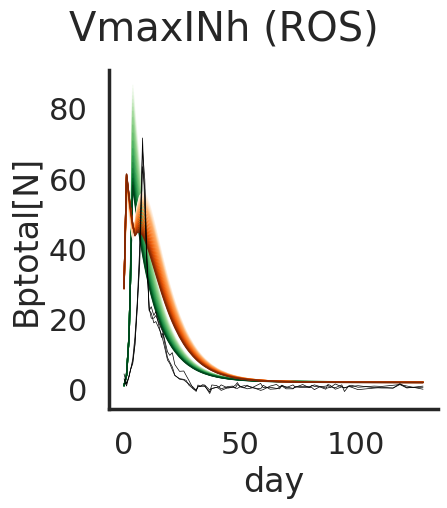

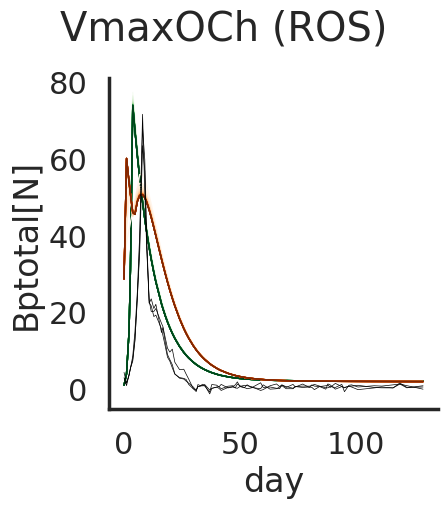

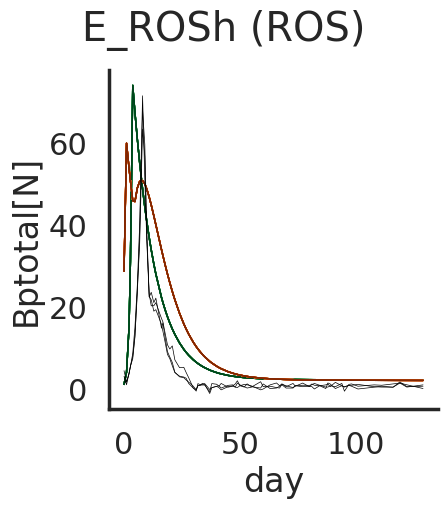

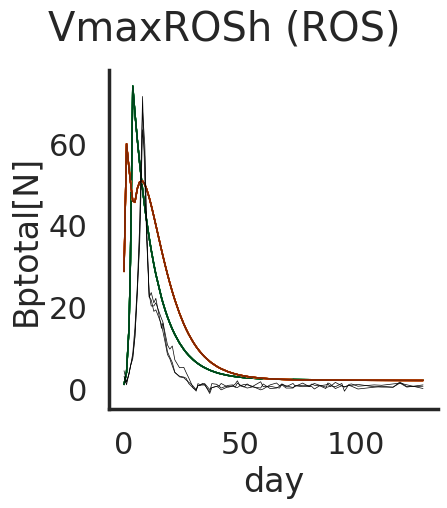

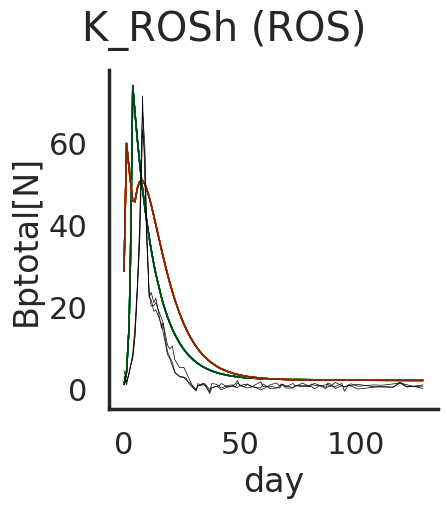

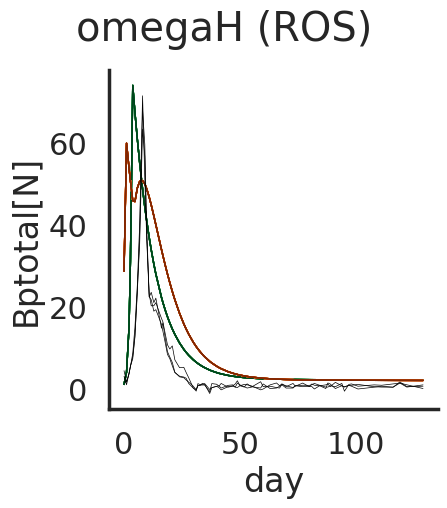

In [33]:

import matplotlib.colors as colors
organism_to_tune = 'HET'
for model in morder: 
    pro_params_to_update, pro_bounds, pro_log_params = get_param_tuning_values(model, organism_to_tune)

    curdf = sdf.loc[sdf.model.isin([model]) & sdf.param.isin(pro_params_to_update) &
                    sdf['mode'].isin(['all'])
                   ]
    for p in pro_params_to_update:
        
        g = sns.relplot(
            data=curdf.loc[curdf.param.isin([p])], x='day', y='Bptotal[N]',
            units='run_id', estimator=None,
             kind='line', hue_norm=colors.LogNorm(),
            lw=1, legend=False, palette='Greens',
            hue='paramval', 
        )
        sns.lineplot(
            data=curdf.loc[curdf.param.isin([p])], 
            x='day', y='Bhtotal[N]',
            units='run_id', estimator=None,
             hue_norm=colors.LogNorm(),
             lw=1, legend=False, palette='Oranges',
            hue='paramval', 
        )
        datadf = refdf 
        sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
        units='Sample', estimator=None, lw=0.5, color='black',

                     legend=False
                    )
        g.set_titles(col_template='{col_name}')
        plt.suptitle(f'{p} ({model})', y=1.05)
        plt.show()


In [34]:
sdf.describe()

Bp             Np            Cp            Bh            Nh  \
count  248640.000000  248640.000000  2.486400e+05  1.243200e+05  1.243200e+05   
mean       21.362474       0.878270  6.594866e+01  1.655148e+01  3.964138e+00   
std        25.139577       2.703386  7.903778e+01  1.545248e+01  4.757872e+00   
min         0.001423       0.000000 -2.320476e-20 -6.534034e-22 -1.009391e-22   
25%         2.131175       0.060328  6.543067e+00  1.915715e+00  4.604031e-01   
50%         9.922535       0.064278  2.919717e+01  1.086520e+01  1.760273e+00   
75%        33.275488       0.685813  1.023971e+02  3.004538e+01  6.155176e+00   
max       118.839755      53.828906  5.233620e+02  8.984089e+01  3.846789e+01   

                 Ch            DON           RDON           DIN  \
count  1.243200e+05  248640.000000  248640.000000  2.486400e+05   
mean   4.169486e+00      54.747806      43.182373  4.749841e+00   
std    1.318351e+01      40.900485      34.133589  1.932686e+01   
min   -1.266117e-14       0.002138       0.000000  1.554541e-09   
25%    2.490282e-01       8.548089      20.434609  1.073260e-04   
50%    5.584011e-01      66.268460      34.927994  2.582731e-03   
75%    3.066394e+00      96.152259      53.839485  4.690055e-03   
max    1.585338e+02     113.804897     149.454206  1.026217e+02   

                 DOC  ...  overflowCh          Bp[C]     Bptotal[N]  \
count  248640.000000  ...    124320.0  248640.000000  248640.000000   
mean      486.719205  ...         0.0     141.526388      22.240743   
std       627.403556  ...         0.0     166.549695      26.123819   
min         0.000594  ...         0.0       0.009429       0.001428   
25%         0.019155  ...         0.0      14.119038       2.205496   
50%        90.834718  ...         0.0      65.736794      10.703959   
75%       932.153119  ...         0.0     220.450105      34.106961   
max      4447.066156  ...         0.0     787.313380     120.264471   

          Bptotal[C]  log_Bptotal[N]  log_Bptotal[C]         Bh[C]  \
count  248640.000000   248640.000000   248640.000000  1.243200e+05   
mean      207.475044        2.254492        4.473168  8.275739e+01   
std       245.241927        1.443218        1.461430  7.726238e+01   
min         0.013839       -6.551247       -4.280285 -3.267017e-21   
25%        20.579137        0.790953        3.024278  9.578573e+00   
50%        94.916422        2.370614        4.552997  5.432598e+01   
75%       321.525038        3.529502        5.773075  1.502269e+02   
max      1179.968773        4.789693        7.073243  4.492045e+02   

         Bhtotal[N]    Bhtotal[C]      paramval  
count  1.243200e+05  1.243200e+05  2.486400e+05  
mean   2.051562e+01  8.692688e+01  1.421027e-01  
std    1.905715e+01  8.290371e+01  2.582751e-01  
min   -4.247018e-22 -3.551725e-21  2.314815e-09  
25%    2.462574e+00  9.874732e+00  1.157407e-05  
50%    1.333214e+01  5.624287e+01  6.348392e-04  
75%    3.673031e+01  1.566573e+02  1.632397e-01  
max    1.029972e+02  4.781005e+02  2.502723e+00  

[8 rows x 48 columns]